# Introdução

## Coleta de dados

Importando as bibliotecas necessárias para fazer o projeto

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


Para abrir o arquivo csv, precisamos descobrir em qual tipo ele foi salvo, logo tentaremos os tipos mais conhecidos

In [2]:
# Descobrir qual tipo de arquivo
possiveis = [
    "utf-8",
    "utf-16-le",
    "utf-16-be",
    "utf-16",
    "utf-16-sig",
    "latin1",
    "iso-8859-1",
    "windows-1252",
    "cp1252"
]

for enc in possiveis:
    try:
        df = pd.read_csv('empreendimento-geracao-distribuida.csv', sep= ';', encoding=enc)
        print(f"Funcionou com: {enc}")
        print(df.head())
        break  # para no primeiro que der certo
    except Exception as e:
        print(f"Falhou com {enc}: {str(e)}")

Falhou com utf-8: 'utf-8' codec can't decode byte 0xe7 in position 5: invalid continuation byte
Falhou com utf-16-le: 'utf-16-le' codec can't decode bytes in position 160402-160403: illegal UTF-16 surrogate
Falhou com utf-16-be: 'utf-16-be' codec can't decode bytes in position 11316-11317: illegal UTF-16 surrogate
Falhou com utf-16: 'utf-16' codec can't decode bytes in position 0-1: Stream does not start with BOM
Falhou com utf-16-sig: unknown encoding: utf-16-sig


C:\Users\Cássio Lanna\AppData\Local\Temp\ipykernel_5944\868282902.py:16: DtypeWarning: Columns (30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('empreendimento-geracao-distribuida.csv', sep= ';', encoding=enc)


Funcionou com: latin1
  DatGeracaoConjuntoDados AnmPeriodoReferencia  NumCNPJDistribuidora  \
0              2026-01-16              01/2026         4065033000170   
1              2026-01-16              01/2026         4065033000170   
2              2026-01-16              01/2026         4065033000170   
3              2026-01-16              01/2026         4065033000170   
4              2026-01-16              01/2026         4065033000170   

  SigAgente                                     NomAgente CodClasseConsumo  \
0       EAC  ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A               CO   
1       EAC  ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A               CO   
2       EAC  ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A               RE   
3       EAC  ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A               RE   
4       EAC  ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A               RE   

  DscClasseConsumo  CodSubGrupoTarifario DscSubGrupoTarifario  CodUFibge  ..

## Informações iniciais

Primeiro precisamos descobrir as inforamções básicas do banco de dados.

In [3]:
df.shape

(3913121, 33)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3913121 entries, 0 to 3913120
Data columns (total 33 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   DatGeracaoConjuntoDados       object 
 1   AnmPeriodoReferencia          object 
 2   NumCNPJDistribuidora          int64  
 3   SigAgente                     object 
 4   NomAgente                     object 
 5   CodClasseConsumo              object 
 6   DscClasseConsumo              object 
 7   CodSubGrupoTarifario          float64
 8   DscSubGrupoTarifario          object 
 9   CodUFibge                     float64
 10  SigUF                         object 
 11  CodRegiao                     float64
 12  NomRegiao                     object 
 13  CodMunicipioIbge              int64  
 14  NomMunicipio                  object 
 15  CodCEP                        object 
 16  SigTipoConsumidor             object 
 17  NumCPFCNPJ                    object 
 18  NomTitularEmpreendimen

Não é mostrado todas as colunas, logo irei colocar o código para aumentar o número de colunas apresentadas

In [5]:
pd.options.display.max_columns = 33

Verificarei as primeiras 5 linhas e as últimas 5 linhas do conjunto de dados

In [6]:
df.head()

,DatGeracaoConjuntoDados,AnmPeriodoReferencia,NumCNPJDistribuidora,SigAgente,NomAgente,CodClasseConsumo,DscClasseConsumo,CodSubGrupoTarifario,DscSubGrupoTarifario,CodUFibge,SigUF,CodRegiao,NomRegiao,CodMunicipioIbge,NomMunicipio,CodCEP,SigTipoConsumidor,NumCPFCNPJ,NomTitularEmpreendimento,CodEmpreendimento,DthAtualizaCadastralEmpreend,SigModalidadeEmpreendimento,DscModalidadeHabilitado,QtdUCRecebeCredito,SigTipoGeracao,DscFonteGeracao,DscPorte,NumCoordNEmpreendimento,NumCoordEEmpreendimento,MdaPotenciaInstaladaKW,NomSubEstacao,NumCoordESub,NumCoordNSub
0,2026-01-16,01/2026,4065033000170,EAC,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,CO,Comercial,NaN,B3,12.0,AC,2.0,Norte,1200401,Rio Branco,69912452,PJ,12005360000165,ELITE ENGENHARIA LTDA,GD.AC.000.000.590,2016-08-31,NaN,Geracao na propria UC,1,UFV,Radiação solar,Microgeracao,"-10,00","-67,84","32,50",NaN,NaN,NaN
1,2026-01-16,01/2026,4065033000170,EAC,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,CO,Comercial,NaN,B3,12.0,AC,2.0,Norte,1200401,Rio Branco,69900273,PJ,05458883000100,ADVOCACIA PALÁCIO DANTAS,GD.AC.000.001.540,2016-10-31,NaN,Geracao na propria UC,1,UFV,Radiação solar,Microgeracao,"-7,60","-72,67","2,00",NaN,NaN,NaN
2,2026-01-16,01/2026,4065033000170,EAC,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,RE,Residencial,NaN,B1,12.0,AC,2.0,Norte,1200401,Rio Branco,69919***,PF,***.754.418-**,***,GD.AC.000.001.552,2016-08-25,NaN,Geracao na propria UC,1,UFV,Radiação solar,Microgeracao,"-9,95","-67,86","2,00",NaN,NaN,NaN
3,2026-01-16,01/2026,4065033000170,EAC,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,RE,Residencial,NaN,B1,12.0,AC,2.0,Norte,1200401,Rio Branco,69917***,PF,***.204.362-**,***,GD.AC.000.009.608,2017-03-09,NaN,Geracao na propria UC,1,UFV,Radiação solar,Microgeracao,"-9,96","-67,87","5,00",NaN,NaN,NaN
4,2026-01-16,01/2026,4065033000170,EAC,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,RE,Residencial,NaN,B1,12.0,AC,2.0,Norte,1200401,Rio Branco,69919***,PF,***.099.182-**,***,GD.AC.000.017.465,2017-07-29,NaN,Geracao na propria UC,1,UFV,Radiação solar,Microgeracao,"-9,96","-67,86","5,00",NaN,NaN,NaN


In [7]:
df.tail()

,DatGeracaoConjuntoDados,AnmPeriodoReferencia,NumCNPJDistribuidora,SigAgente,NomAgente,CodClasseConsumo,DscClasseConsumo,CodSubGrupoTarifario,DscSubGrupoTarifario,CodUFibge,SigUF,CodRegiao,NomRegiao,CodMunicipioIbge,NomMunicipio,CodCEP,SigTipoConsumidor,NumCPFCNPJ,NomTitularEmpreendimento,CodEmpreendimento,DthAtualizaCadastralEmpreend,SigModalidadeEmpreendimento,DscModalidadeHabilitado,QtdUCRecebeCredito,SigTipoGeracao,DscFonteGeracao,DscPorte,NumCoordNEmpreendimento,NumCoordEEmpreendimento,MdaPotenciaInstaladaKW,NomSubEstacao,NumCoordESub,NumCoordNSub
3913116,2026-01-16,01/2026,25086034000171,ETO,ENERGISA TOCANTINS DISTRIBUIDORA DE ENERGIA S.A.,RE,Residencial,NaN,B1,17.0,TO,2.0,Norte,1721000,Palmas,77019***,PF,***.105.511-**,***,GD.TO.003.669.003,2025-12-30,NaN,Geracao na propria UC,1,UFV,Radiação solar,Microgeracao,"-10,27","-48,32","5,00",NaN,NaN,NaN
3913117,2026-01-16,01/2026,25086034000171,ETO,ENERGISA TOCANTINS DISTRIBUIDORA DE ENERGIA S.A.,RE,Residencial,NaN,B1,17.0,TO,2.0,Norte,1709500,Gurupi,77435***,PF,***.463.731-**,***,GD.TO.003.669.004,2025-12-31,NaN,Geracao na propria UC,1,UFV,Radiação solar,Microgeracao,"-11,72","-49,07","10,00",NaN,NaN,NaN
3913118,2026-01-16,01/2026,25086034000171,ETO,ENERGISA TOCANTINS DISTRIBUIDORA DE ENERGIA S.A.,RE,Residencial,NaN,B1,17.0,TO,2.0,Norte,1715705,Palmeirante,77798***,PF,***.866.791-**,***,GD.TO.003.669.005,2025-12-08,NaN,Geracao na propria UC,1,UFV,Radiação solar,Microgeracao,"-7,86","-47,93","6,00",NaN,NaN,NaN
3913119,2026-01-16,01/2026,25086034000171,ETO,ENERGISA TOCANTINS DISTRIBUIDORA DE ENERGIA S.A.,RE,Residencial,NaN,B1,17.0,TO,2.0,Norte,1716703,Colméia,77725***,PF,***.171.471-**,***,GD.TO.003.669.006,2025-12-11,NaN,Geracao na propria UC,1,UFV,Radiação solar,Microgeracao,"-8,73","-48,75","4,27",NaN,NaN,NaN
3913120,2026-01-16,01/2026,25086034000171,ETO,ENERGISA TOCANTINS DISTRIBUIDORA DE ENERGIA S.A.,RE,Residencial,NaN,B1,17.0,TO,2.0,Norte,1700707,Alvorada,77480***,PF,***.397.731-**,***,GD.TO.003.669.007,2025-12-05,NaN,Geracao na propria UC,1,UFV,Radiação solar,Microgeracao,"-12,49","-49,13","6,00",NaN,NaN,NaN


### Verificando valores únicos

In [8]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valores únicos")

DatGeracaoConjuntoDados: 1 valores únicos
AnmPeriodoReferencia: 1 valores únicos
NumCNPJDistribuidora: 103 valores únicos
SigAgente: 102 valores únicos
NomAgente: 103 valores únicos
CodClasseConsumo: 9 valores únicos
DscClasseConsumo: 9 valores únicos
CodSubGrupoTarifario: 0 valores únicos
DscSubGrupoTarifario: 11 valores únicos
CodUFibge: 27 valores únicos
SigUF: 27 valores únicos
CodRegiao: 5 valores únicos
NomRegiao: 5 valores únicos
CodMunicipioIbge: 5566 valores únicos
NomMunicipio: 5290 valores únicos
CodCEP: 114201 valores únicos
SigTipoConsumidor: 2 valores únicos
NumCPFCNPJ: 1192413 valores únicos
NomTitularEmpreendimento: 242750 valores únicos
CodEmpreendimento: 3910654 valores únicos
DthAtualizaCadastralEmpreend: 4102 valores únicos
SigModalidadeEmpreendimento: 0 valores únicos
DscModalidadeHabilitado: 4 valores únicos
QtdUCRecebeCredito: 791 valores únicos
SigTipoGeracao: 4 valores únicos
DscFonteGeracao: 16 valores únicos
DscPorte: 2 valores únicos
NumCoordNEmpreendimento:

### Verificando valores vazios

In [9]:
for col in df.columns:
    print(f"{col}: {df[col].isnull().sum()} valores nulos")

DatGeracaoConjuntoDados: 0 valores nulos
AnmPeriodoReferencia: 0 valores nulos
NumCNPJDistribuidora: 0 valores nulos
SigAgente: 411 valores nulos
NomAgente: 0 valores nulos
CodClasseConsumo: 0 valores nulos
DscClasseConsumo: 0 valores nulos
CodSubGrupoTarifario: 3913121 valores nulos
DscSubGrupoTarifario: 0 valores nulos
CodUFibge: 2 valores nulos
SigUF: 2 valores nulos
CodRegiao: 2 valores nulos
NomRegiao: 2 valores nulos
CodMunicipioIbge: 0 valores nulos
NomMunicipio: 2 valores nulos
CodCEP: 9946 valores nulos
SigTipoConsumidor: 9946 valores nulos
NumCPFCNPJ: 9946 valores nulos
NomTitularEmpreendimento: 10007 valores nulos
CodEmpreendimento: 0 valores nulos
DthAtualizaCadastralEmpreend: 0 valores nulos
SigModalidadeEmpreendimento: 3913121 valores nulos
DscModalidadeHabilitado: 629 valores nulos
QtdUCRecebeCredito: 0 valores nulos
SigTipoGeracao: 9683 valores nulos
DscFonteGeracao: 9683 valores nulos
DscPorte: 0 valores nulos
NumCoordNEmpreendimento: 343 valores nulos
NumCoordEEmpreen

### Entendendo o que contém nas colunas

In [10]:
# Verificando as distribuidoras existentes
df['SigAgente'].value_counts()

SigAgente
CEMIG-D             371252
COPEL-DIS           299980
RGE SUL             287829
CPFL-PAULISTA       284642
COELBA              263918
                     ...  
CERIS                  105
COOPERMILA              68
CERAL                   67
CERSAD DISTRIBUI        54
CODESAM                 20
Name: count, Length: 102, dtype: int64

In [11]:
# Tipos de Consumidores
df['DscClasseConsumo'].value_counts()

DscClasseConsumo
Residencial           3118789
Comercial              380058
Rural                  343212
Industrial              52828
Poder Público           11056
REBR                     6656
Serviço Público           392
Iluminação pública        125
Consumo Próprio             5
Name: count, dtype: int64

In [12]:
# Qual seria a forma de tarifa, no qual se for A contém uma tensão de 2,3 kV a 230kV e se for B seria residêncial, rural, iluminação pública ou outra classe
df['DscSubGrupoTarifario'].value_counts()

DscSubGrupoTarifario
B1     3138398
B3      383499
B2      345211
A4       34806
AS        4110
A3a       3333
A3        1434
A1        1268
B4         820
A2         213
A3A         29
Name: count, dtype: int64

In [13]:
# A forma em que é utilizada a energia gerada
df['DscModalidadeHabilitado'].value_counts()

DscModalidadeHabilitado
Geracao na propria UC    3154294
Auto consumo remoto       740735
Compartilhada              17122
Condomínio                   341
Name: count, dtype: int64

In [14]:
df['DscPorte'].value_counts()

DscPorte
Microgeracao    3893524
Minigeracao       19597
Name: count, dtype: int64

In [15]:
# Descobrir se é solar, eólica, térmica, hidrelétrica ou outra
df['SigTipoGeracao'].value_counts()

SigTipoGeracao
UFV    3902656
UTE        611
EOL        100
CGH         71
Name: count, dtype: int64

In [16]:
# Verificando os valores minimo e máximo das colunas quantitativas
max_kw = df['MdaPotenciaInstaladaKW'].max()
min_kw = df['MdaPotenciaInstaladaKW'].min()
max_uni = df['QtdUCRecebeCredito'].max()
min_uni = df['QtdUCRecebeCredito'].min()

print(f"Temos que os valores máximo e mínimo dos kW intalados são: {max_kw} e {min_kw}, respectivamente")

print(f"Temos que os valores máximo e mínimo dos unidades instaladas são: {max_uni} e {min_uni}, respectivamente")

Temos que os valores máximo e mínimo dos kW intalados são: 999,96 e ,00, respectivamente
Temos que os valores máximo e mínimo dos unidades instaladas são: 41809 e 1, respectivamente


## Limpeza e Preparação

Para evitar modificações no arquivo original, faremos uma cópia do dataset

In [17]:
dados = df.copy()

### Eliminando colunas irrelevantes

Eliminaremos as colunas que não serão utilizadas no dado projeto.

As colunas DatGeracaoConjuntoDados e AnmPeriodoReferencia apesar de serem importantes, contém apenas uma data, logo será desconsiderada.

As colunas que serão eliminadas por conterem mais de uma coluna com o mesmo propósito: CodUFibge, CodRegiao, CodMunicipioIbge.

Também eliminaremos as colunas CodSubGrupoTarifario e SigModalidadeEmpreendimento por estarem vazias.

As colunas NomSubEstacao, NumCoordESub, NumCoordNSub serão desconsideradas por conter menos de 1% dos dados não nulos.

In [18]:
dados = dados.drop(columns=['DatGeracaoConjuntoDados', 'AnmPeriodoReferencia', 'NumCNPJDistribuidora', 'CodSubGrupoTarifario', 'CodUFibge', 'CodRegiao', 'CodMunicipioIbge', 'CodCEP', 'NumCPFCNPJ', 'NomTitularEmpreendimento', 'CodEmpreendimento', 'SigModalidadeEmpreendimento', 'NomSubEstacao', 'NumCoordESub', 'NumCoordNSub'])

dados.head()

,SigAgente,NomAgente,CodClasseConsumo,DscClasseConsumo,DscSubGrupoTarifario,SigUF,NomRegiao,NomMunicipio,SigTipoConsumidor,DthAtualizaCadastralEmpreend,DscModalidadeHabilitado,QtdUCRecebeCredito,SigTipoGeracao,DscFonteGeracao,DscPorte,NumCoordNEmpreendimento,NumCoordEEmpreendimento,MdaPotenciaInstaladaKW
0,EAC,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,CO,Comercial,B3,AC,Norte,Rio Branco,PJ,2016-08-31,Geracao na propria UC,1,UFV,Radiação solar,Microgeracao,"-10,00","-67,84","32,50"
1,EAC,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,CO,Comercial,B3,AC,Norte,Rio Branco,PJ,2016-10-31,Geracao na propria UC,1,UFV,Radiação solar,Microgeracao,"-7,60","-72,67","2,00"
2,EAC,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,RE,Residencial,B1,AC,Norte,Rio Branco,PF,2016-08-25,Geracao na propria UC,1,UFV,Radiação solar,Microgeracao,"-9,95","-67,86","2,00"
3,EAC,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,RE,Residencial,B1,AC,Norte,Rio Branco,PF,2017-03-09,Geracao na propria UC,1,UFV,Radiação solar,Microgeracao,"-9,96","-67,87","5,00"
4,EAC,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,RE,Residencial,B1,AC,Norte,Rio Branco,PF,2017-07-29,Geracao na propria UC,1,UFV,Radiação solar,Microgeracao,"-9,96","-67,86","5,00"


Verificando novamente os dados vazios

In [19]:
for col in dados.columns:
    print(f"{col}: {dados[col].isnull().sum()} estão vazios ")

SigAgente: 411 estão vazios 
NomAgente: 0 estão vazios 
CodClasseConsumo: 0 estão vazios 
DscClasseConsumo: 0 estão vazios 
DscSubGrupoTarifario: 0 estão vazios 
SigUF: 2 estão vazios 
NomRegiao: 2 estão vazios 
NomMunicipio: 2 estão vazios 
SigTipoConsumidor: 9946 estão vazios 
DthAtualizaCadastralEmpreend: 0 estão vazios 
DscModalidadeHabilitado: 629 estão vazios 
QtdUCRecebeCredito: 0 estão vazios 
SigTipoGeracao: 9683 estão vazios 
DscFonteGeracao: 9683 estão vazios 
DscPorte: 0 estão vazios 
NumCoordNEmpreendimento: 343 estão vazios 
NumCoordEEmpreendimento: 343 estão vazios 
MdaPotenciaInstaladaKW: 0 estão vazios 


### Valores Faltantes

Com esses dados ausentes temos duas opções:

1- Eliminamos as linha que possuem os dados ausentes, considerando que a quantidade de dados é ínfima;

2- Substituir os dados qualitativos pela moda e os quantitativos pela mediana.


#### Coluna SigAgente

Como a coluna é a sigla do nome da distribuidora, precisamos nos basear no nome contido na coluna NomAgente

In [20]:
dados[dados["SigAgente"].isnull()]['NomAgente'].unique()

array(['CRERAL - COOPERATIVA REGIONAL DE ELETRIFICACAO RURAL DO ALTO URUGUAI'],
      dtype=object)

In [21]:
dados[dados["NomAgente"] == "CRERAL - COOPERATIVA REGIONAL DE ELETRIFICACAO RURAL DO ALTO URUGUAI"]

,SigAgente,NomAgente,CodClasseConsumo,DscClasseConsumo,DscSubGrupoTarifario,SigUF,NomRegiao,NomMunicipio,SigTipoConsumidor,DthAtualizaCadastralEmpreend,DscModalidadeHabilitado,QtdUCRecebeCredito,SigTipoGeracao,DscFonteGeracao,DscPorte,NumCoordNEmpreendimento,NumCoordEEmpreendimento,MdaPotenciaInstaladaKW
2634184,NaN,CRERAL - COOPERATIVA REGIONAL DE ELETRIFICACAO...,RU,Rural,B2,RS,Sul,Gramado dos Loureiros,PF,2017-06-20,Geracao na propria UC,1,UFV,Radiação solar,Microgeracao,"-27,45","-52,92","2,08"
2639361,NaN,CRERAL - COOPERATIVA REGIONAL DE ELETRIFICACAO...,RU,Rural,A4,RS,Sul,Nonoai,PF,2018-10-20,Geracao na propria UC,1,UFV,Radiação solar,Minigeracao,"-27,24","-52,78","110,00"
2640296,NaN,CRERAL - COOPERATIVA REGIONAL DE ELETRIFICACAO...,RU,Rural,A4,RS,Sul,Trindade do Sul,PF,2019-01-20,Geracao na propria UC,1,UFV,Radiação solar,Minigeracao,"-27,49","-52,89","108,00"
2640301,NaN,CRERAL - COOPERATIVA REGIONAL DE ELETRIFICACAO...,RU,Rural,B2,RS,Sul,Erval Grande,PF,2019-02-05,Geracao na propria UC,1,UFV,Radiação solar,Microgeracao,"-27,38","-52,58","5,00"
2641260,NaN,CRERAL - COOPERATIVA REGIONAL DE ELETRIFICACAO...,RE,Residencial,B1,RS,Sul,Floriano Peixoto,PF,2019-02-20,Auto consumo remoto,2,UFV,Radiação solar,Microgeracao,"-27,86","-52,09","3,00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3018396,NaN,CRERAL - COOPERATIVA REGIONAL DE ELETRIFICACAO...,RU,Rural,B2,RS,Sul,Gramado dos Loureiros,PF,2025-11-25,Geracao na propria UC,1,UFV,Radiação solar,Microgeracao,"-27,28","-52,52","9,76"
3018397,NaN,CRERAL - COOPERATIVA REGIONAL DE ELETRIFICACAO...,RU,Rural,B2,RS,Sul,São José do Ouro,PF,2025-11-11,Geracao na propria UC,1,UFV,Radiação solar,Microgeracao,"-27,53","-51,60","4,09"
3018398,NaN,CRERAL - COOPERATIVA REGIONAL DE ELETRIFICACAO...,RE,Residencial,B1,RS,Sul,Santo Expedito do Sul,PF,2025-11-11,Geracao na propria UC,1,UFV,Radiação solar,Microgeracao,"-27,91","-51,64","7,38"
3018399,NaN,CRERAL - COOPERATIVA REGIONAL DE ELETRIFICACAO...,RU,Rural,B2,RS,Sul,Ipiranga do Sul,PF,2025-11-11,Geracao na propria UC,1,UFV,Radiação solar,Microgeracao,"-27,92","-52,38","5,85"


Como a CRERAL não possui nenhuma sigla utilizada na coluna SigAgente, utilizarei CRERAL como a sigla oficial para esse projeto

In [22]:
dados['SigAgente'] = dados['SigAgente'].fillna('CRERAL')

#### Colunas SigUF, NomRegiao, NomMunicípio

In [23]:
dados[dados['SigUF'].isnull()]

,SigAgente,NomAgente,CodClasseConsumo,DscClasseConsumo,DscSubGrupoTarifario,SigUF,NomRegiao,NomMunicipio,SigTipoConsumidor,DthAtualizaCadastralEmpreend,DscModalidadeHabilitado,QtdUCRecebeCredito,SigTipoGeracao,DscFonteGeracao,DscPorte,NumCoordNEmpreendimento,NumCoordEEmpreendimento,MdaPotenciaInstaladaKW
3015130,CERILUZ,COOPERATIVA REGIONAL DE ENERGIA E DESENVOLVIME...,RU,Rural,B2,NaN,NaN,NaN,PF,2025-10-27,Geracao na propria UC,1,UFV,Radiação solar,Microgeracao,"-28,02","-53,65","6,00"
3837430,CEDRI,COOPERATIVA DE ELETRIFICACAO E DISTRIBUICAO DA...,RE,Residencial,B1,NaN,NaN,NaN,PF,2025-09-25,Geracao na propria UC,1,UFV,Radiação solar,Microgeracao,"-24,27","-47,22","15,75"


Como são dois dados de localidades diferentes e com agentes de distribuição diferentes irei eliminá-los.

In [24]:
dados = dados.dropna(subset=['SigUF'])

#### Colunas SigTipoConsumidor, DscModalidadeHabilitado, SigTipoGeracao e DscFonteGeracao

Neste caso, substituiremos os valores nulos pela moda.

In [25]:


moda = dados['SigTipoConsumidor'].mode()[0]
dados['SigTipoConsumidor'] = dados['SigTipoConsumidor'].fillna(moda)


In [26]:
moda = dados['DscModalidadeHabilitado'].mode()[0]
dados['DscModalidadeHabilitado'] = dados['DscModalidadeHabilitado'].fillna(moda)

In [27]:
moda = dados['SigTipoGeracao'].mode()[0]
dados['SigTipoGeracao'] = dados['SigTipoGeracao'].fillna(moda)

In [28]:
moda = dados['DscFonteGeracao'].mode()[0]
dados['DscFonteGeracao'] = dados['DscFonteGeracao'].fillna(moda)

#### Colunas NumCoordNEmpreendimento e NumCoordEEmpreendimento

Criando dicionários de referência (Cidade -> Coordenada)


In [29]:
mapa_lat = dados.dropna(subset=['NumCoordNEmpreendimento']).set_index('NomMunicipio')['NumCoordNEmpreendimento'].to_dict()
mapa_lon = dados.dropna(subset=['NumCoordEEmpreendimento']).set_index('NomMunicipio')['NumCoordEEmpreendimento'].to_dict()

In [30]:
# Preenche a Latitude baseada no nome da cidade
dados['NumCoordNEmpreendimento'] = dados['NumCoordNEmpreendimento'].fillna(dados['NomMunicipio'].map(mapa_lat))

# Preenche a Longitude baseada no nome da cidade
dados['NumCoordEEmpreendimento'] = dados['NumCoordEEmpreendimento'].fillna(dados['NomMunicipio'].map(mapa_lon))

### Dados Duplicados

Verificando se existem dados duplicados e se o tiver iremos removê-los

In [31]:
dados.duplicated().value_counts()

False    3863065
True       50054
Name: count, dtype: int64

Como existe 50054 valores duplicados, precisamos eliminá-los do nosso banco de dados.

In [32]:
dados.drop_duplicates(inplace=True)

### Renomeando as colunas

In [33]:
dados.columns

Index(['SigAgente', 'NomAgente', 'CodClasseConsumo', 'DscClasseConsumo',
       'DscSubGrupoTarifario', 'SigUF', 'NomRegiao', 'NomMunicipio',
       'SigTipoConsumidor', 'DthAtualizaCadastralEmpreend',
       'DscModalidadeHabilitado', 'QtdUCRecebeCredito', 'SigTipoGeracao',
       'DscFonteGeracao', 'DscPorte', 'NumCoordNEmpreendimento',
       'NumCoordEEmpreendimento', 'MdaPotenciaInstaladaKW'],
      dtype='object')

In [34]:
dados = dados.rename(columns= {'SigAgente' : 'Sigla_distribuidora', 'NomAgente' : 'Distribuidora', 'CodClasseConsumo' : 'Codigo_consumo',
                               'DscClasseConsumo' : 'Classe_consumidor', 'DscSubGrupoTarifario' : 'Classe_consumidor', 'DscSubGrupoTarifario' : 'Grupo_Tarifario', 
                            'SigUF' : 'Estado', 'NomRegiao' : 'Região', 'NomMunicipio' : 'Municipio', 'SigTipoConsumidor': 'Tipo_consumidor', 'DthAtualizaCadastralEmpreend' : "Data_Atualizacao",
                        'DscModalidadeHabilitado' : 'Modalidade', 'QtdUCRecebeCredito' : 'Unidades_Consumidoras', 'SigTipoGeracao' : 'Tipo_geracao', 'DscFonteGeracao' : 'Fonte_combustivel', 
                    'DscPorte' : 'Porte', 'NumCoordNEmpreendimento' : 'Latitude', 'NumCoordEEmpreendimento' : 'Longitude', 'MdaPotenciaInstaladaKW' : 'kW_instalados' })

### Removendo linhas

In [35]:
# Descobre qual é a data mínima
data_minima = dados['Data_Atualizacao'].min()

# Mantém apenas os dados que são MAIORES que a data mínima
dados = dados[dados['Data_Atualizacao'] > data_minima]

## Exportação

Agora iremos salvar a planilha gerada em um arquivo csv, assim podemos criar Dashboards em outros tipos de software

In [36]:
dados.shape

(3863060, 18)

In [37]:
#dados.to_csv('geracao_distribuida_limpo.csv', encoding='utf-8-sig', index=False, sep=';')

Agora que temos todo a planilha limpa, podemos utilizá-la para fazer a análise se quisermos

A partir daqui decidi fazer uma análise complementar do que fiz no Power BI.

In [38]:
dados = pd.read_csv('geracao_distribuida_limpo.csv', sep=';', encoding='utf-8-sig')

### Modificando os tipos de dados

Ao exportar o arquivo, percebi que se o modificasse o tipo de da coluna antes de salvar no arquivo csv geraria um erro, onde exportaria a coluna como valor vazio, logo o fiz agora

In [39]:
# numeros inteiro
dados['Unidades_Consumidoras'] = pd.to_numeric(dados['Unidades_Consumidoras'], errors='coerce').astype('Int64')

# data
dados['Data_Atualizacao'] = pd.to_datetime(dados['Data_Atualizacao'], dayfirst=True, errors='coerce')

# numeros reais, por os valores possuirem ',' e não '.' precisamos fazer algumas alterações

dados['kW_instalados'] = dados['kW_instalados'].astype(str).str.strip()

dados['kW_instalados'] = dados['kW_instalados'].str.replace(',', '.', regex=False)

dados['kW_instalados'] = pd.to_numeric(dados['kW_instalados'], errors='coerce')



C:\Users\Cássio Lanna\AppData\Local\Temp\ipykernel_5944\220303212.py:5: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  dados['Data_Atualizacao'] = pd.to_datetime(dados['Data_Atualizacao'], dayfirst=True, errors='coerce')


In [40]:
# adicionaremos as colunas mês e ano ao data frame
dados['Mes_Ano'] = dados['Data_Atualizacao'].dt.to_period('M')

dados['Ano'] = dados['Mes_Ano'].dt.year

dados = dados[dados['Ano'] != 2026]

# Análise e Interpretação

## Maturidade por localização

### Maior  concentração de energia

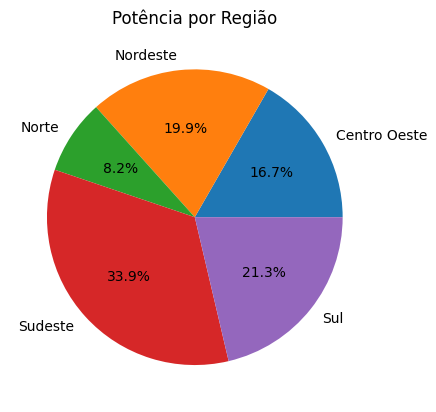

In [41]:
# Potência Regional
regiao = dados.groupby('Região')['kW_instalados'].sum()

regiao.plot(kind='pie', autopct='%1.1f%%', title="Potência por Região")
plt.ylabel('')
plt.show()

Percebemos que a maior parte da geração de energia limpa se encontra no Sudeste, sendo seguido pelo Sul e Nordeste. Enquanto no Norte há o menor índice.

Dica para pesquisa mais robusta: Podemos tentar verificar se há incentivos nas regiões para entender se isso influenciou na decisão de aderir pelas fontes renováveis. E se no Norte existe algum fator que influencia a pouca aderência

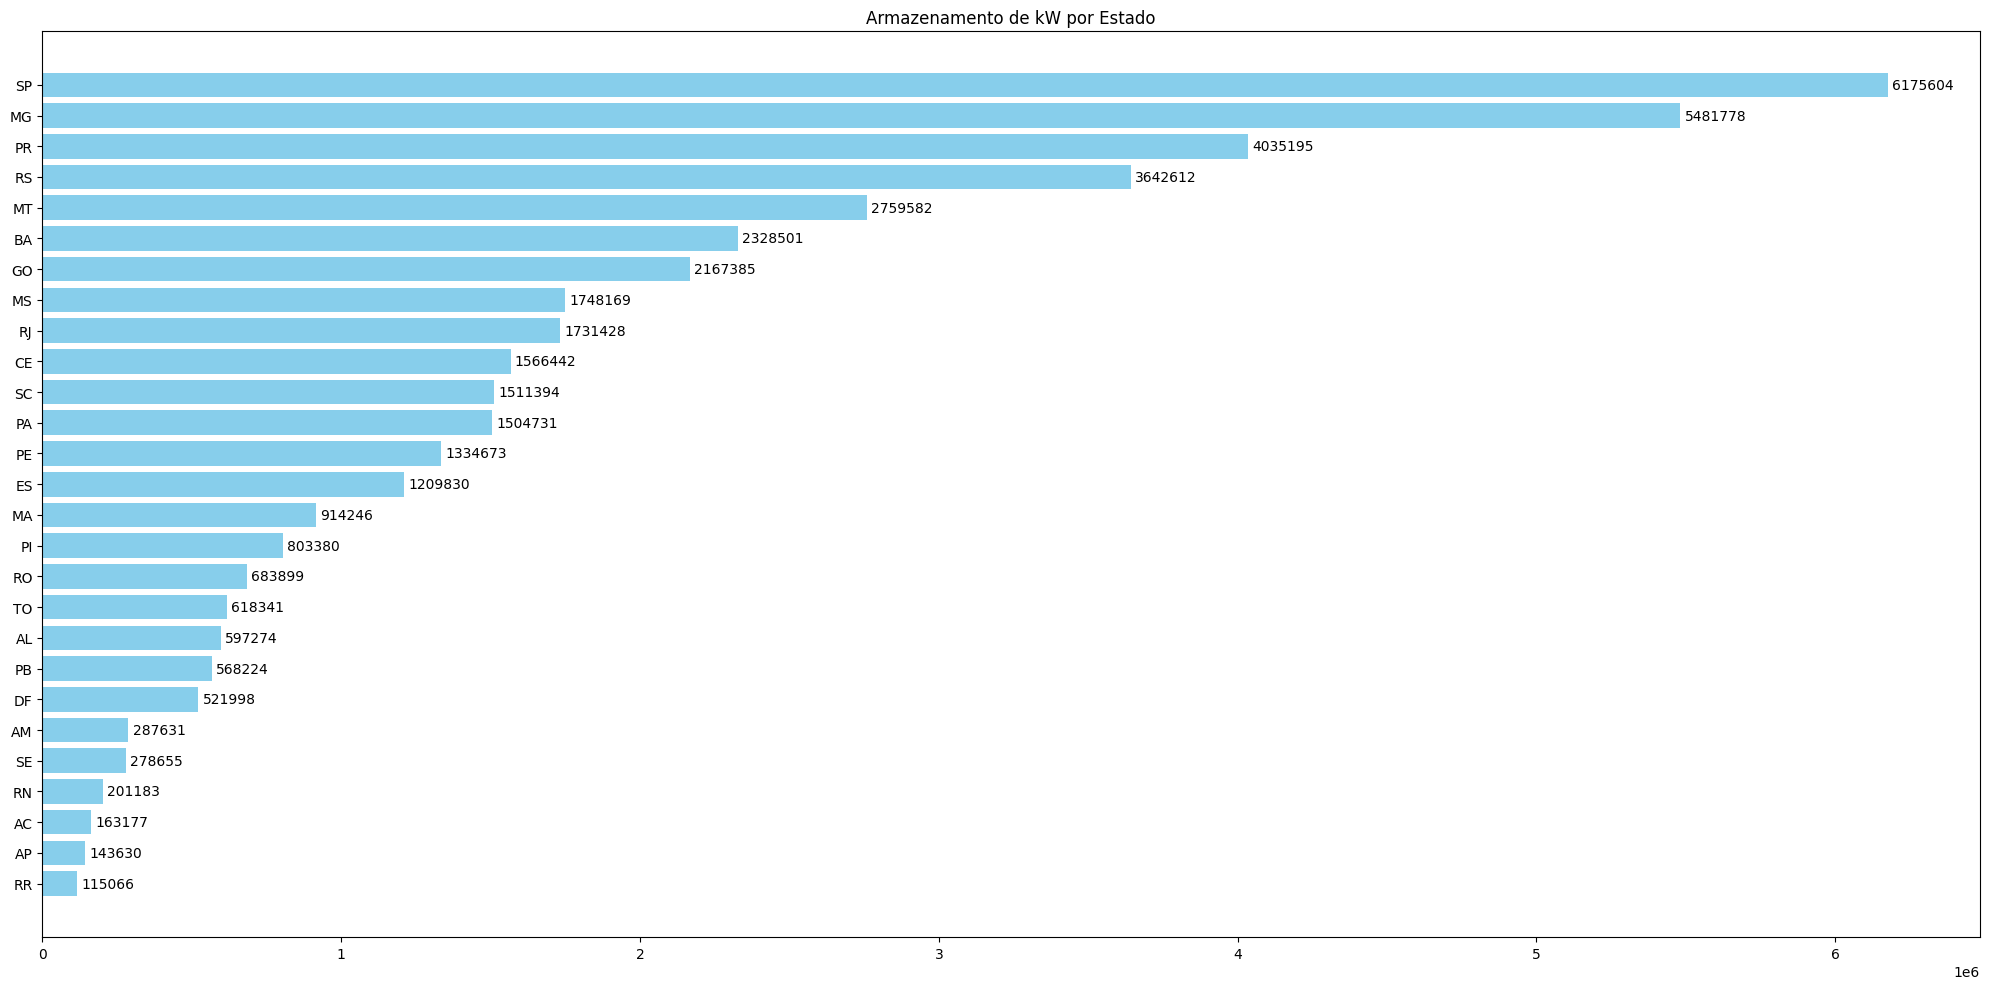

In [42]:
# Potência por estado
estado = dados.groupby('Estado')['kW_instalados'].sum().sort_values()

plt.figure(figsize=(20,10))
plt.title("Armazenamento de kW por Estado")
bar = plt.barh(estado.index, estado.values, color='skyblue')
plt.bar_label(bar, fmt='%.0f', padding=3)
plt.tight_layout()
plt.show()

In [43]:
# 1. Calcular a potência total de todos os estados
total_brasil = dados['kW_instalados'].sum()

# 2. Obter a soma apenas dos 5 estados com maior potência
# Agrupamos, somamos, ordenamos do maior para o menor e pegamos os 5 primeiros
top_5_soma = dados.groupby('Estado')['kW_instalados'].sum().sort_values(ascending=False).head(5).sum()

# 3. Calcular o percentual
percentual_top5 = (top_5_soma / total_brasil) * 100

print(f"Soma Top 5 Estados: {top_5_soma:,.2f} kW")
print(f"Soma Total Brasil: {total_brasil:,.2f} kW")
print(f"Os 5 maiores estados representam {percentual_top5:.2f}% do total nacional.")

Soma Top 5 Estados: 22,094,771.05 kW
Soma Total Brasil: 43,094,028.17 kW
Os 5 maiores estados representam 51.27% do total nacional.


Percebe-se que os estados São Paulo, Minas Gerais e Paraná possuem a maior fonte de energia renovável do Brasil, enquanto Acre, Amapá e Roraima estão nas últimas posições

### Maturidade por Municipio

In [44]:
# Agrupamento por região
maturidade_minicipio = dados.groupby(['Municipio', 'Estado']).agg(
    potencia_total = ('kW_instalados', 'sum'),
    qtd_modalidades = ('Modalidade', 'nunique'),
    qtd_unidades = ('Unidades_Consumidoras', 'sum'),
    clientes = ('Unidades_Consumidoras', 'count')
).reset_index()

# Ticket Médio de Energia
maturidade_minicipio['Potencia_media_unidade'] = (
    maturidade_minicipio['potencia_total'] / maturidade_minicipio['qtd_modalidades']
)

# Top 10 cidades
top_10 = maturidade_minicipio.nlargest(10,'potencia_total')

top_10.head(10)

,Municipio,Estado,potencia_total,qtd_modalidades,qtd_unidades,clientes,Potencia_media_unidade
717,Brasília,DF,521998.49,3,31387,30235,173999.496667
1440,Cuiabá,MT,422692.44,3,48017,38976,140897.480000
928,Campo Grande,MS,404705.18,3,60675,45594,134901.726667
4196,Rio de Janeiro,RJ,349208.26,2,37198,36802,174604.130000
5166,Teresina,PI,344827.04,3,46907,35562,114942.346667
1898,Goiânia,GO,335410.30,3,37070,30067,111803.433333
1792,Fortaleza,CE,306406.52,3,39635,31007,102135.506667
554,Belém,PA,238711.74,3,33499,26190,79570.580000
2843,Manaus,AM,218134.47,4,16536,13705,54533.617500
4985,São Paulo,SP,196461.24,3,25823,21357,65487.080000


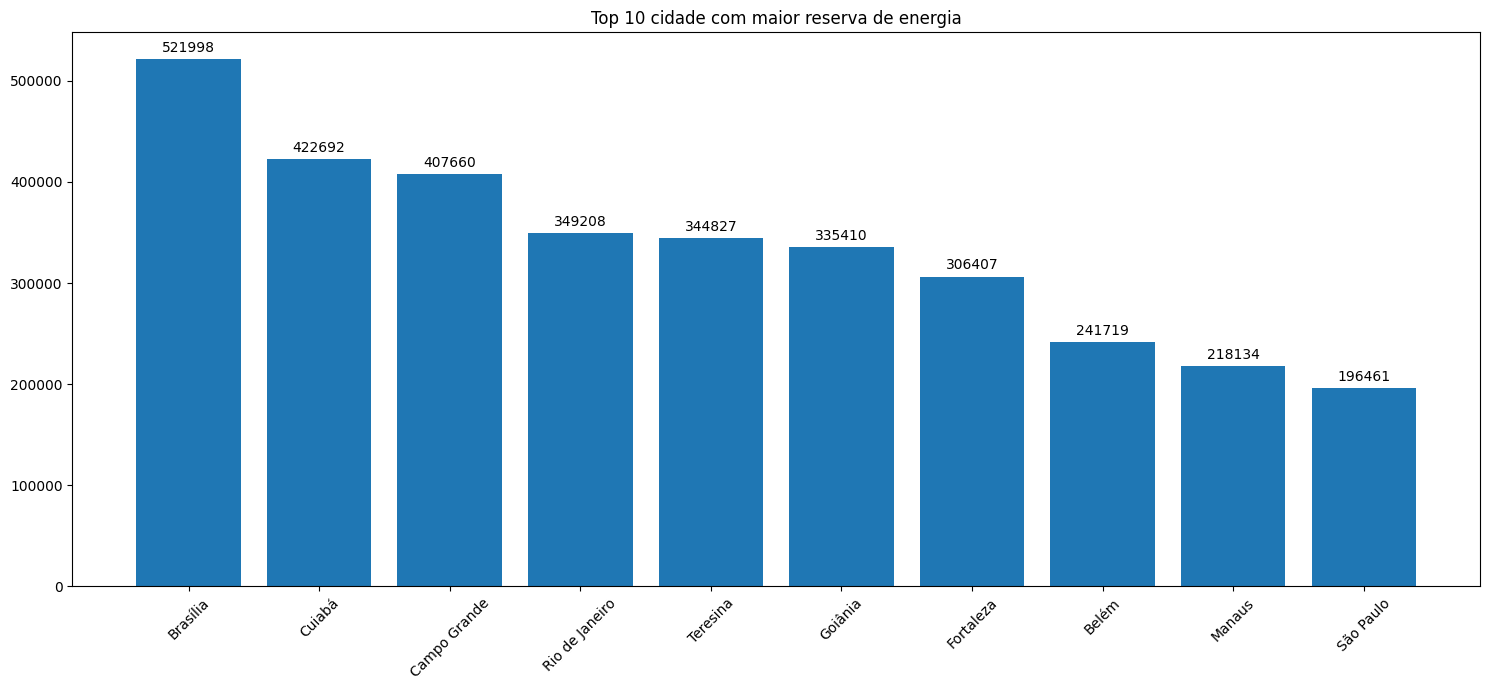

In [45]:
cidade = dados.groupby('Municipio')['kW_instalados'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(15,7))
plt.title("Top 10 cidade com maior reserva de energia")
bar = plt.bar(cidade.index, cidade.values)
plt.bar_label(bar, fmt='%.0f', padding=3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Enquanto Distrito Federal se encontra na 21ª posição em fontes renováveis, Brasília (521998,49 kW) é a cidade que mais teve aderência, seguido por Cuiabá (422692,44 kW) e Campo Grande(407660,08 kW), ao qual os seus estados se encontram 5ª e 8ª posição, com 2759581,92 kW e 1748169,45 kW instalados respectivamente. Em contra parte a cidade de São Paulo (196461,24 kW) se encontra na 10ª posição, enquanto o estado ocupa o 1º lugar com 6175611,64 kW.

Isso dá uma indicativa de que em alguns estados há uma concentração maior de aderência em poucas cidades, enquanto em outros pode haver maior diversificação.

### Maturidade Estado

In [46]:
maturidade_estado = dados.groupby('Estado').agg(
    potencia_total = ('kW_instalados', 'sum'),
    qtd_modalidades = ('Modalidade', 'nunique'),
    qtd_unidades = ('Unidades_Consumidoras', 'sum'),
    clientes = ('Unidades_Consumidoras', 'count')
).reset_index()

maturidade_estado['Total_Clientes(%)'] = (maturidade_estado['clientes'] / maturidade_estado['clientes'].sum()) *100
maturidade_estado['Total_kW(%)'] = (maturidade_estado['potencia_total'] / maturidade_estado['potencia_total'].sum()) *100

maturidade_estado

,Estado,potencia_total,qtd_modalidades,qtd_unidades,clientes,Total_Clientes(%),Total_kW(%)
0,AC,163177.01,3,15953,14938,0.386689,0.378653
1,AL,597274.17,3,75018,51255,1.326799,1.385979
2,AM,287630.54,4,18961,15756,0.407864,0.667449
3,AP,143630.25,3,12945,12062,0.31224,0.333295
4,BA,2328500.59,3,452313,261844,6.778155,5.403302
5,CE,1566442.50,3,174153,134817,3.489904,3.634941
6,DF,521998.49,3,31387,30235,0.78267,1.211301
7,ES,1209830.49,3,178417,91716,2.374182,2.807420
8,GO,2167384.66,3,359135,168698,4.366956,5.029432
9,MA,914245.85,4,112554,79913,2.068647,2.121514


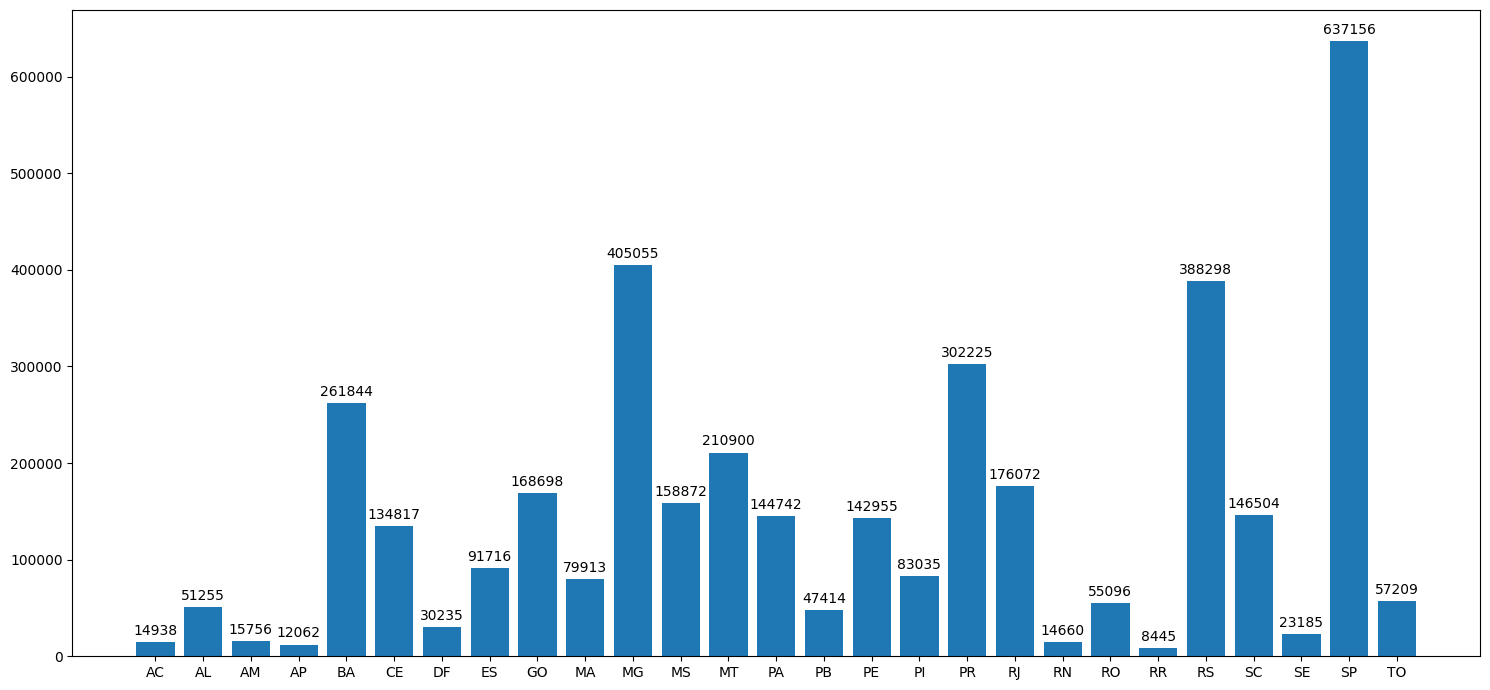

In [47]:
plt.figure(figsize=(15,7))

bar = plt.bar(maturidade_estado['Estado'], maturidade_estado['clientes'])
plt.bar_label(bar, padding=3, fmt='%.0f')

plt.tight_layout()
plt.show()

### Maturidade Região

In [48]:
maturidade_regiao = dados.groupby('Região').agg(
    potencia_total = ('kW_instalados', 'sum'),
    qtd_modalidades = ('Modalidade', 'nunique'),
    qtd_unidades = ('Unidades_Consumidoras', 'sum'),
    clientes = ('Unidades_Consumidoras', 'count')
).reset_index()

# Média de locações atendidas por uma usina
maturidade_regiao['Locacoes_atendidas'] = (
    maturidade_regiao['clientes'] / maturidade_regiao['qtd_unidades']
)

maturidade_regiao['Total_Clientes(%)'] = (maturidade_regiao['clientes'] / maturidade_regiao['clientes'].sum()) *100
maturidade_regiao['Total_kW(%)'] = (maturidade_regiao['potencia_total'] / maturidade_regiao['potencia_total'].sum()) *100

maturidade_regiao

,Região,potencia_total,qtd_modalidades,qtd_unidades,clientes,Locacoes_atendidas,Total_Clientes(%),Total_kW(%)
0,Centro Oeste,7197134.52,4,877720,568705,0.647934,14.721631,16.701002
1,Nordeste,8592578.33,4,1323020,839078,0.634214,21.72057,19.939139
2,Norte,3516474.23,4,381153,308248,0.808725,7.97938,8.160004
3,Sudeste,14598640.60,4,3156800,1309999,0.414977,33.910942,33.876250
4,Sul,9189200.49,4,1177230,837027,0.711014,21.667477,21.323605


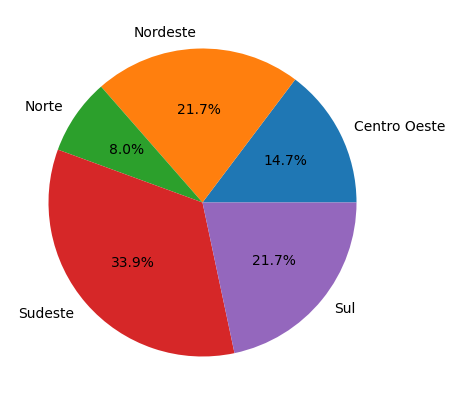

In [49]:
plt.figure(figsize=(10,5))

plt.pie(maturidade_regiao['Total_Clientes(%)'], labels= maturidade_regiao['Região'], autopct='%1.1f%%')

plt.show()

Apesar do Sul possuir uma quantidade maior de potência instalada, o Nordeste possui aproximadamente 2 mil clientes a mais

## Tipo de Consumidor

### Potência por tipo de pessoa

In [50]:
consumidor = dados.groupby('Tipo_consumidor').agg(
    total_kw = ('kW_instalados', 'sum'),
    total_modalidade = ('Modalidade', 'nunique'),
    total_consumidor = ('Tipo_consumidor','count'),
    total_unidades = ('Unidades_Consumidoras','sum'),
    media_kW = ('kW_instalados','mean')
).reset_index()

# Calcular % de kW por tipo de cliente
consumidor['Consumidor_kW(%)'] = (consumidor['total_kw'] / consumidor['total_kw'].sum()) *100
consumidor['Consumidor_total(%)'] = (consumidor['total_consumidor'] / consumidor['total_consumidor'].sum()) *100
consumidor['Unidades_totais(%)'] = (consumidor['total_unidades'] / consumidor['total_unidades'].sum()) *100
consumidor.head()

,Tipo_consumidor,total_kw,total_modalidade,total_consumidor,total_unidades,media_kW,Consumidor_kW(%),Consumidor_total(%),Unidades_totais(%)
0,PF,27820007.31,4,3544751,4911498,7.848226,64.556526,91.760256,71.017245
1,PJ,15274020.86,4,318306,2004425,47.985338,35.443474,8.239744,28.982755


C:\Users\Cássio Lanna\AppData\Local\Temp\ipykernel_5944\1980882491.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=consumidor, x='Tipo_consumidor', y='total_unidades', ax=ax1, palette='Blues_d')
C:\Users\Cássio Lanna\AppData\Local\Temp\ipykernel_5944\1980882491.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=consumidor, x='Tipo_consumidor', y='media_kW', ax=ax2, palette='Reds_d')


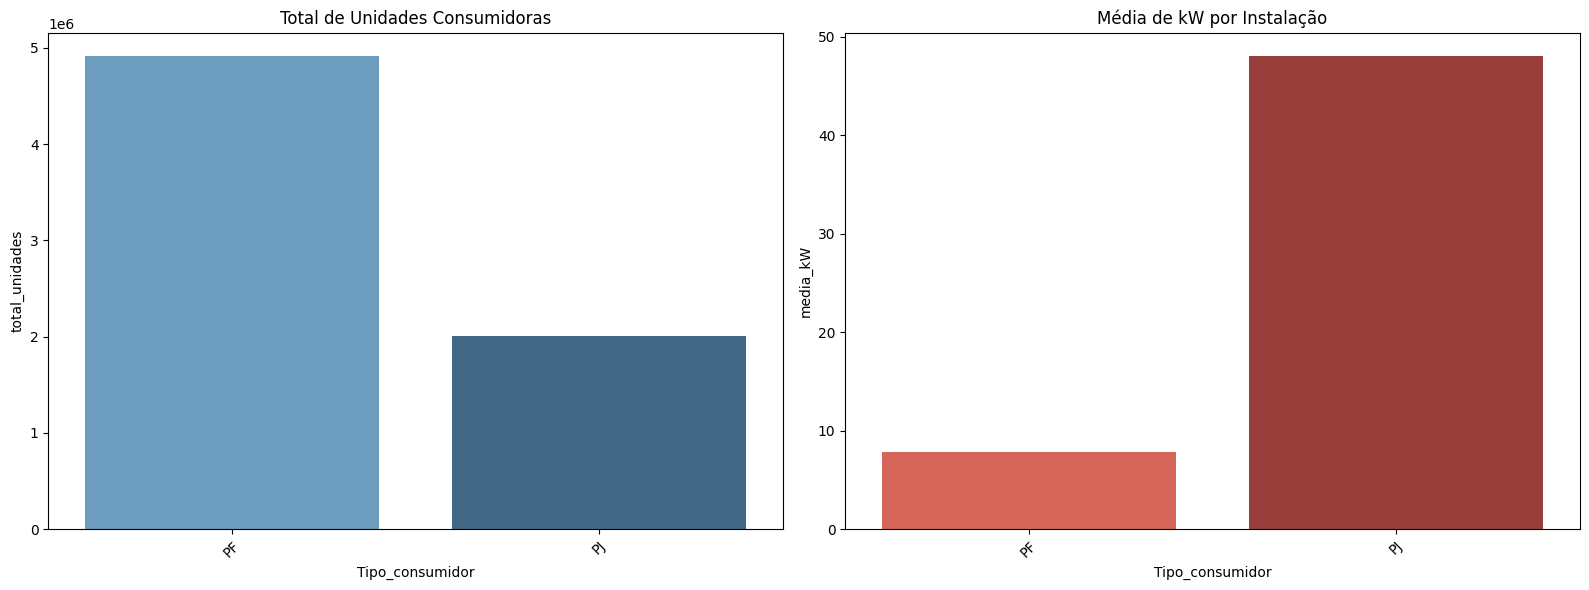

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Soma de Consumidores
sns.barplot(data=consumidor, x='Tipo_consumidor', y='total_unidades', ax=ax1, palette='Blues_d')
ax1.set_title('Total de Unidades Consumidoras')
ax1.tick_params(axis='x', rotation=45)

# Gráfico 2: Média de kW
sns.barplot(data=consumidor, x='Tipo_consumidor', y='media_kW', ax=ax2, palette='Reds_d')
ax2.set_title('Média de kW por Instalação')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Isso torna mais evidente que pessoas físicas estão aderindo as fontes renováveis.

### Tipo de Consumidor por Estado

In [52]:
resumo = dados.groupby(['Estado','Tipo_consumidor']).agg(
    consumidores =('Tipo_consumidor', 'count'),
    kW =('kW_instalados','sum'),
    unidades = ('Unidades_Consumidoras', 'sum')
).reset_index().sort_values('kW', ascending=False)

resumo

,Estado,Tipo_consumidor,consumidores,kW,unidades
50,SP,PF,567675,3638758.73,784186
20,MG,PF,370331,2791624.51,496091
21,MG,PJ,34724,2690153.62,1335268
34,PR,PF,274993,2580342.74,351585
51,SP,PJ,69481,2536845.41,158121
44,RS,PF,356801,2527385.85,464625
24,MT,PF,196380,1848230.61,221998
8,BA,PF,242331,1727636.19,406361
35,PR,PJ,27232,1454851.88,106944
16,GO,PF,155519,1440550.03,337874


In [53]:
fig = px.bar(
    resumo,
    y='Estado',
    x='kW',
    color='Tipo_consumidor',
    title='Potência Instalada por Estado e Tipo de Consumidor',
    labels={'kW':'Potência Total(kW)', 'Tipo_consumidor':'Tipo'},
    barmode='stack', # stack torna o gráfico de coluna empilhada
    height=800
)
fig.update_layout(yaxis={'categoryorder': 'total ascending'}) # agora vai deixar em ordem decrescente se baseando no todo e não no PJ

fig.show()


### Evolução temporal PF ou PJ

In [54]:
evo_pf_pj = dados.groupby(['Tipo_consumidor', 'Ano']).agg(
    kW = ('kW_instalados', 'sum'),
    clientes = ('Unidades_Consumidoras', 'count'),
    qtd_unidades = ('Unidades_Consumidoras', 'sum')
).reset_index().sort_values(by='Ano', ascending=True)

evo_pf_pj['Aumento_Clientes(%)'] = (evo_pf_pj['clientes'].pct_change().fillna(0)) *100
evo_pf_pj['Aumento_kW(%)'] = (evo_pf_pj['kW'].pct_change().fillna(0)) *100

evo_pf_pj

,Tipo_consumidor,Ano,kW,clientes,qtd_unidades,Aumento_Clientes(%),Aumento_kW(%)
0,PF,2009,169.40,20,22,0.0,0.000000
17,PJ,2009,27.45,3,3,-85.0,-83.795750
18,PJ,2010,1.20,1,1,-66.666667,-95.628415
1,PF,2010,50.00,4,5,300.0,4066.666667
2,PF,2011,156.08,34,34,750.0,212.160000
19,PJ,2011,251.65,16,18,-52.941176,61.231420
20,PJ,2012,709.13,12,14,-25.0,181.792172
3,PF,2012,150.00,33,34,175.0,-78.847320
4,PF,2013,381.80,60,71,81.818182,154.533333
21,PJ,2013,571.09,24,25,-60.0,49.578313


## Transição de sistema

### Evolução de Clientes por Ano

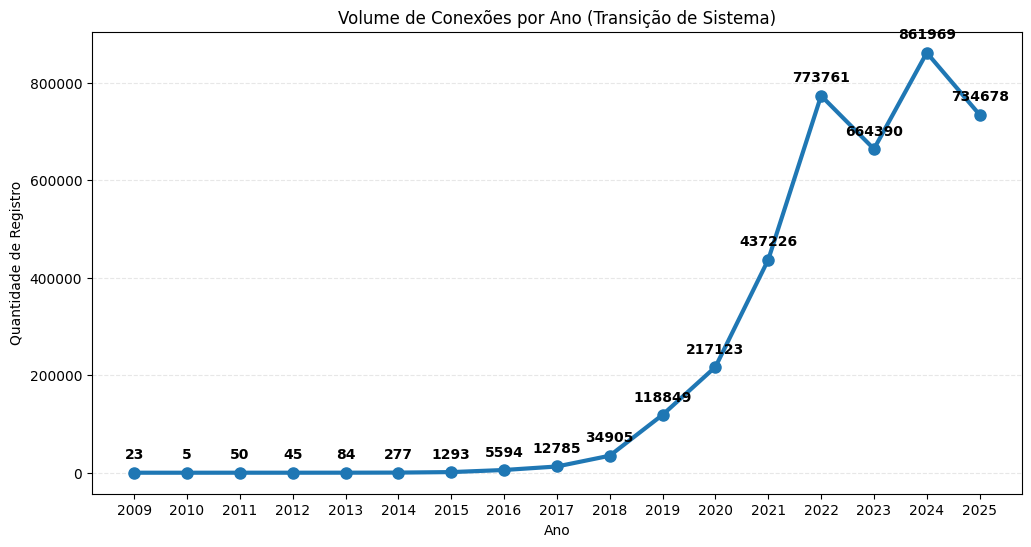

In [55]:
# Criar a coluna de Ano a partir da Mes_Ano
dados['Ano'] = dados['Mes_Ano'].dt.year

# Remover possíveis linhas que ficaram com Ano nulo após a conversão
dados_validos = dados.dropna(subset=['Ano'])

# Agrupar por Ano usando 'count' para ver o volume de conexões
sistema_anual = dados_validos.groupby('Ano').agg(
    conexao = ('Modalidade', 'count')
).reset_index()

# Garantir que o Ano seja string para o gráfico não criar espaços vazios
sistema_anual['Ano_Str'] = sistema_anual['Ano'].astype(int).astype(str)

# --- Plotagem ---
plt.figure(figsize=(12,6))
plt.plot(sistema_anual['Ano_Str'], sistema_anual['conexao'], 
         marker='o', linewidth=3, markersize=8, color='#1f77b4')

# Adicionar os valores acima de cada ponto
for x, y in zip(sistema_anual['Ano_Str'], sistema_anual['conexao']):
    plt.annotate(f'{y}', (x, y), textcoords="offset points", 
                 xytext=(0,10), ha='center', fontweight='bold')

plt.title("Volume de Conexões por Ano (Transição de Sistema)")
plt.xlabel("Ano")
plt.ylabel("Quantidade de Registro")
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.show()

### Evolução Anual de Clientes e Potência instalada

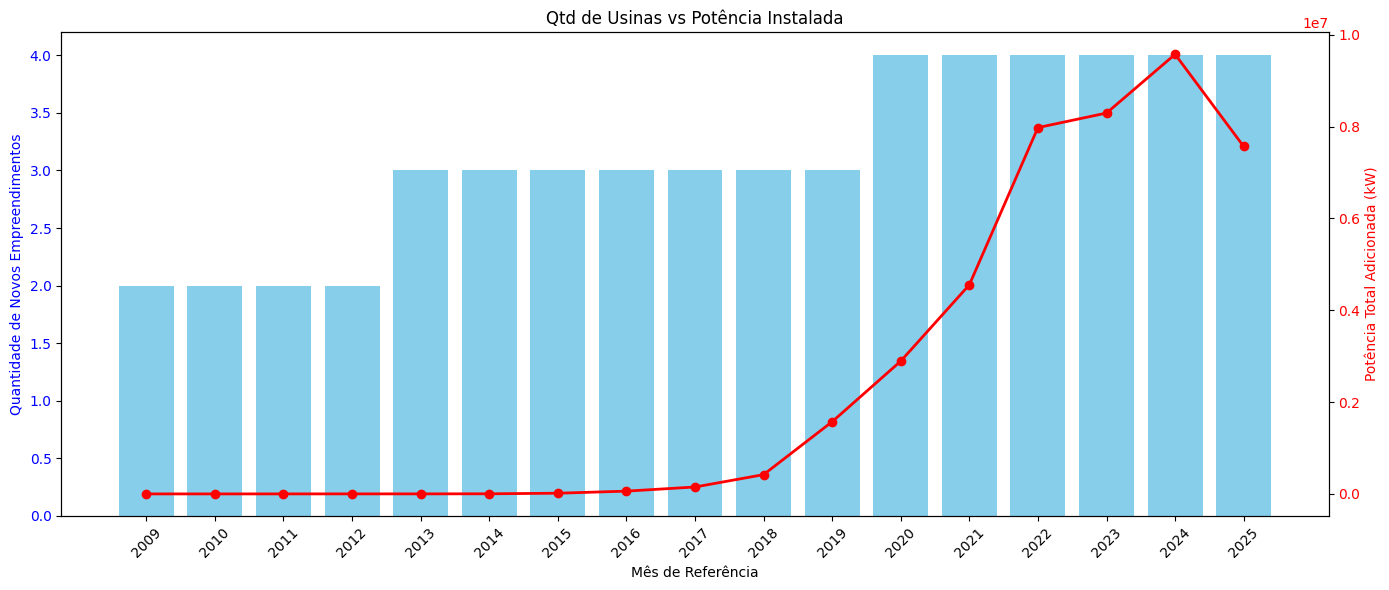

In [56]:
# 1. Agrupamento robusto para auditoria
auditoria = dados.groupby('Ano').agg(
    Qtd_Usinas=('Modalidade', 'nunique'),
    Soma_Potencia=('kW_instalados', 'sum')
).reset_index()

# Converter para string para o eixo X
auditoria['Ano_Str'] = auditoria['Ano'].astype(str)

# 2. Criação do Gráfico com dois eixos (Y1 e Y2)
fig, ax1 = plt.subplots(figsize=(14, 6))

# Eixo 1: Quantidade de Usinas (Barras)
ax1.bar(auditoria['Ano_Str'], auditoria['Qtd_Usinas'], color='skyblue', label='Qtd de Usinas')
ax1.set_xlabel('Mês de Referência')
ax1.set_ylabel('Quantidade de Novos Empreendimentos', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=45)

# Eixo 2: Potência Total (Linha)
ax2 = ax1.twinx() 
ax2.plot(auditoria['Ano_Str'], auditoria['Soma_Potencia'], color='red', marker='o', linewidth=2, label='Potência Total (kW)')
ax2.set_ylabel('Potência Total Adicionada (kW)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Finalização
plt.title('Qtd de Usinas vs Potência Instalada')
fig.tight_layout()
plt.show()

### Evolução por Período

In [57]:
# Criar um período de tempo para analisar de forma mais fácil.
def intervalo(ano):
    if 2009 <= ano <= 2012:
        return '2009-2012'
    elif 2013 <= ano <= 2016:
        return '2013-2016'
    elif 2017 <= ano <= 2020:
        return '2017-2020'
    elif 2020 <= ano <=2024:
        return '2020-2024'
    elif 2025 == ano:
        return '2025'
    else:
        return 'Outros'

In [58]:
# Criando a nova coluna com o intervalo
dados['Periodo'] = dados['Ano'].apply(intervalo)

# Agrupando e obtendo as informações que desejo

analise = dados.groupby('Periodo').agg(
    qtd_aderencia = ('Modalidade', 'count'),
    kW = ('kW_instalados', 'sum')
).reset_index()

# ordenar os períodos
ordem = ['2009-2012', '2013-2016', '2017-2020', '2020-2024', '2025', 'Outros']

analise['Periodo'] = pd.Categorical(analise['Periodo'], categories=ordem, ordered=True)
analise = analise.sort_values('Periodo')

# quero entender o aumento percentual em relação aos períodos, logo utilizo o pct_change
analise['Crescimento(%)'] = analise['qtd_aderencia'].pct_change() *100
# mas no primeiro período sai NaN, uma vez que não existe forma de comparação com um outro período, para isso iremos substituir por 0
analise['Crescimento(%)'] = analise['Crescimento(%)'].fillna(0)
analise

,Periodo,qtd_aderencia,kW,Crescimento(%)
0,2009-2012,123,1514.91,0.000000
1,2013-2016,7248,79553.55,5792.682927
2,2017-2020,383662,5036593.70,5193.349890
3,2020-2024,2737346,30407352.38,613.478531
4,2025,734678,7569013.63,-73.160938


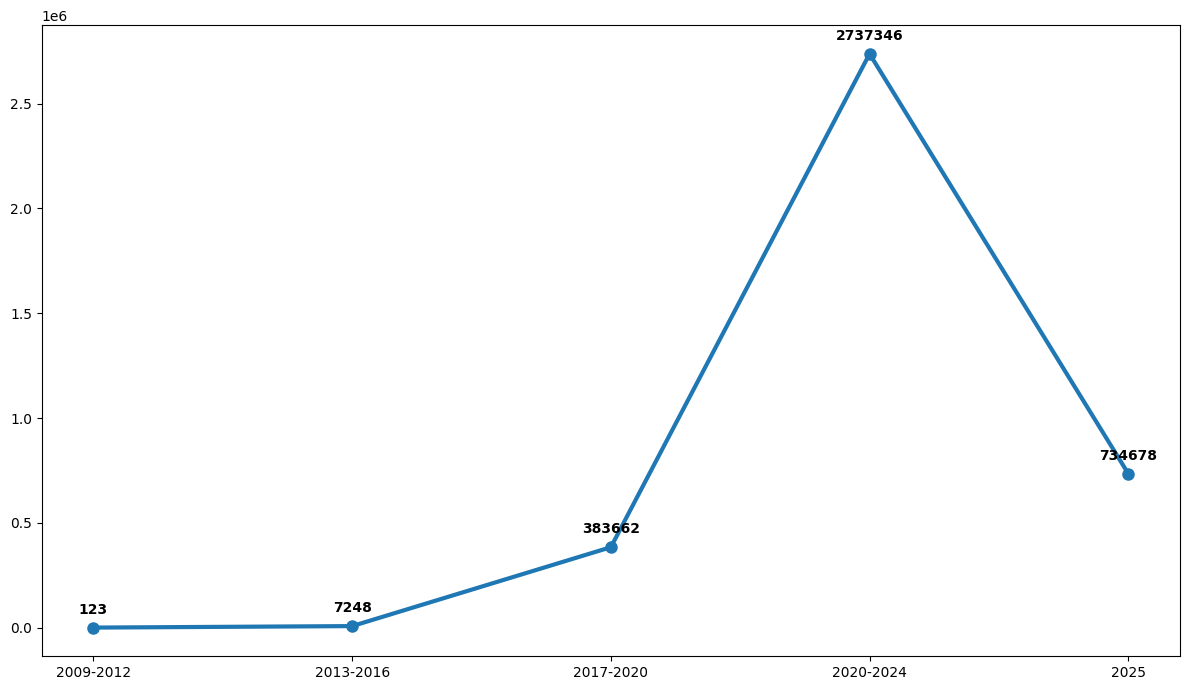

In [59]:
plt.figure(figsize=(12,7))

plt.plot(analise['Periodo'], analise['qtd_aderencia'], marker='o', linewidth=3,
         markersize=8, color='#1f77b4')


# {y}, (x,y) garante escrever os valores nas coordenadas, textcoords coloca os valores nas marcações
# xytext define o espaçamento entre o valor e o ponto demarcado

for x,y in zip(analise['Periodo'], analise['qtd_aderencia']):
    plt.annotate(f'{y}', (x,y), textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

Percebe-se que  ocorreu um aumento de atualização de tipos energéticos utilizados, mas em específico a partir de 2018 há um crescimento considerável. Percebemos pricipalmente que em 2020, ano em que a pandemia entra em vigor, ocorreu um grande aumento das quantidades de usinas e a potência adicionada. 

Podendo significar que as pessoas durante a pandemia perceberam que econômicamente era mais viável a utilização deste método. Mas seria essencial uma pesquisa aprofundada para confirmar se foi por isso ou se tiveram fatores externos.

### Evolução anual por Estado

In [60]:
evol_uf = dados.groupby(['Ano', 'Estado']).agg(
    qtd_unidades = ('Unidades_Consumidoras', 'sum'),
    qtd_clientes = ('Unidades_Consumidoras', 'count'),
    kW = ('kW_instalados', 'sum')
).reset_index()

evol_uf = evol_uf.sort_values(['Estado', 'Ano'], ascending=True)

evol_uf['Evolução_clientes(%)'] = (evol_uf.groupby('Estado')['qtd_clientes'].pct_change().fillna(0)) *100
evol_uf['Evolução_potencia(%)'] = (evol_uf.groupby('Estado')['kW'].pct_change().fillna(0)) *100

evol_uf

,Ano,Estado,qtd_unidades,qtd_clientes,kW,Evolução_clientes(%),Evolução_potencia(%)
71,2016,AC,3,3,36.50,0.0,0.000000
97,2017,AC,16,15,192.81,400.0,428.246575
124,2018,AC,32,30,429.34,100.0,122.675172
151,2019,AC,129,129,2397.76,330.0,458.475800
178,2020,AC,506,500,5968.64,287.596899,148.925664
...,...,...,...,...,...,...,...
231,2021,TO,8314,6329,62055.94,94.200675,65.231443
258,2022,TO,12721,9495,92744.40,50.0237,49.452897
285,2023,TO,13268,10287,121415.89,8.341232,30.914524
312,2024,TO,15213,12123,126281.43,17.847769,4.007334


In [61]:
evol_uf.sort_values('Evolução_potencia(%)', ascending=False).head(10)

,Ano,Estado,qtd_unidades,qtd_clientes,kW,Evolução_clientes(%),Evolução_potencia(%)
39,2014,PE,7,4,381.43,300.0,12614.333333
100,2017,AP,8,8,555.00,700.0,6837.500000
135,2018,MS,1524,1008,17062.16,2624.324324,4529.160562
90,2016,RO,14,14,212.10,1300.0,4142.000000
54,2015,GO,30,19,279.74,850.0,3659.946237
86,2016,PI,126,109,2132.60,3533.333333,2861.944444
118,2017,RR,4,4,83.00,300.0,2694.612795
45,2014,SC,28,25,393.73,733.333333,2632.338654
21,2013,MG,11,11,178.36,1000.0,2522.941176
62,2015,PI,3,3,72.00,200.0,2300.000000


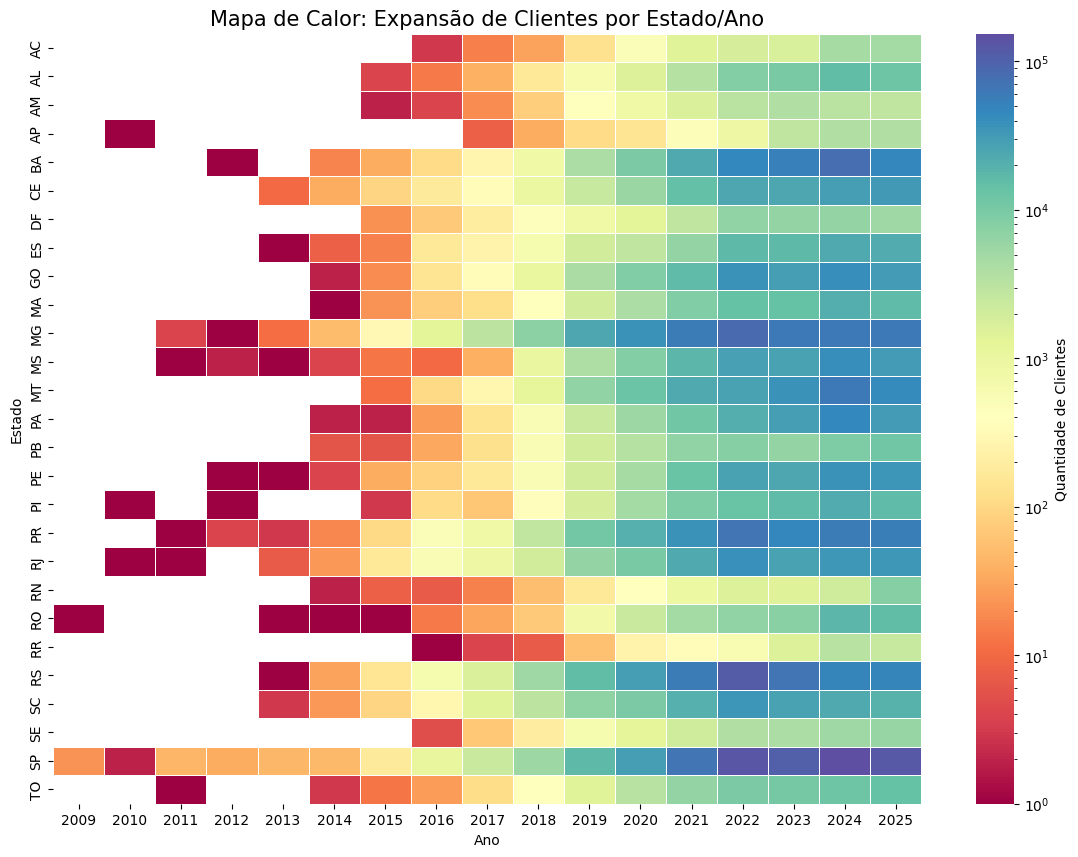

In [ ]:
import matplotlib.colors as colors

# Necessário criar uma tabela pivotada
heatmap_data = evol_uf.pivot(index='Estado', columns='Ano', values='qtd_clientes').fillna(0)

# Força a conversão de toda a matriz para float (garante que não existam 'objects')
heatmap_data = heatmap_data.astype(float)

# 4. Gera o gráfico
plt.figure(figsize=(14, 10))
sns.heatmap(
    heatmap_data, 
    norm= colors.LogNorm(vmin=1, vmax=heatmap_data.max().max()), # necessário criar uma normalização logaritmica para mostar de forma mais limpa o gráfico 
    annot=False,      # retira os numeros de dentro dos quadrados
    cmap='Spectral',   
    linewidths=.5, 
    cbar_kws={'label': 'Quantidade de Clientes'}
)

plt.title('Mapa de Calor: Expansão de Clientes por Estado/Ano', fontsize=15)
plt.xlabel('Ano')
plt.ylabel('Estado')
plt.show()

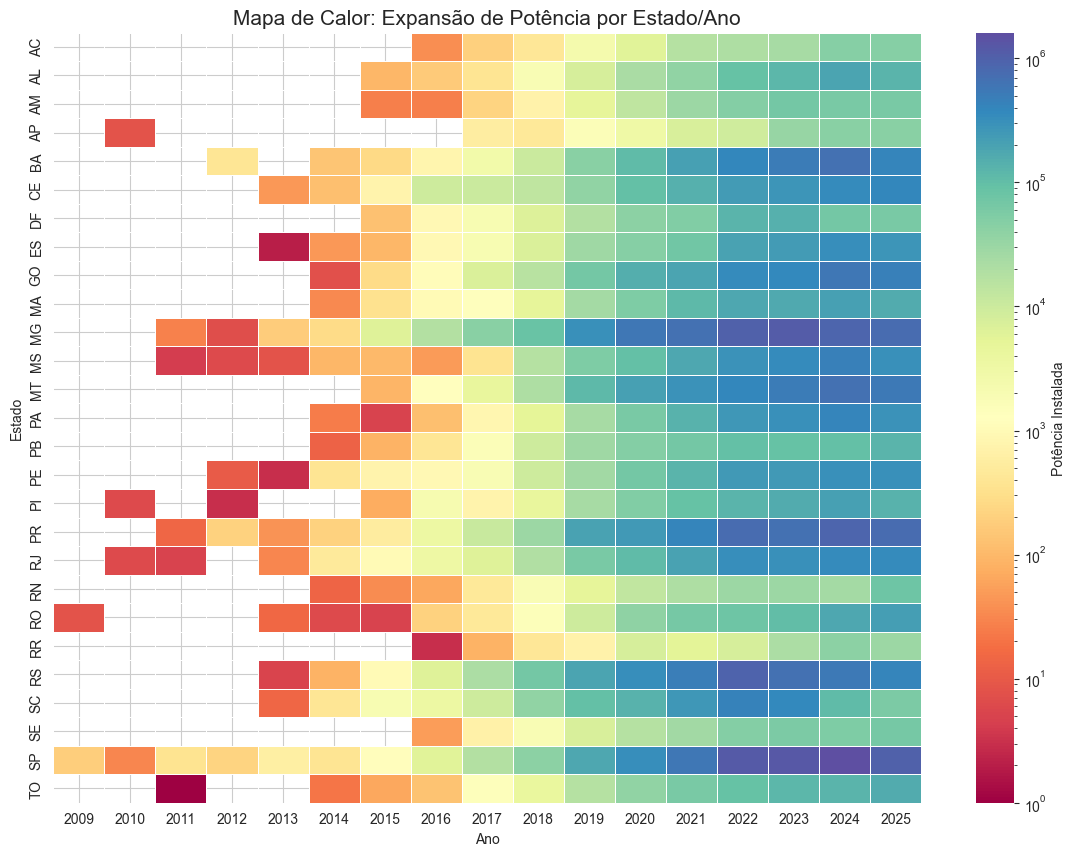

In [ ]:

# Necessário criar uma tabela pivotada
heatmap_data = evol_uf.pivot(index='Estado', columns='Ano', values='kW').fillna(0)

# Força a conversão de toda a matriz para float (garante que não existam 'objects')
heatmap_data = heatmap_data.astype(float)

# 4. Gera o gráfico
plt.figure(figsize=(14, 10))
sns.heatmap(
    heatmap_data, 
    norm= colors.LogNorm(vmin=1, vmax=heatmap_data.max().max()), # necessário criar uma normalização logaritmica para mostar de forma mais limpa o gráfico 
    annot=False,      # retira os numeros de dentro dos quadrados
    cmap='Spectral',   
    linewidths=.5, 
    cbar_kws={'label': 'Potência Instalada'}
)

plt.title('Mapa de Calor: Expansão de Potência por Estado/Ano', fontsize=15)
plt.xlabel('Ano')
plt.ylabel('Estado')
plt.show()

### Evolução anual por região

In [63]:
evolucao_regional = dados.groupby(['Região', 'Ano']).agg(
    qtd_unidades = ('Unidades_Consumidoras', 'sum'),
    qtd_clientes = ('Unidades_Consumidoras', 'count'),
    kW = ('kW_instalados', 'sum')
).reset_index()

evolucao_regional['Crescimento_kW(%)'] = evolucao_regional['kW'].pct_change().fillna(0)
evolucao_regional['Crescimento_clientes(%)'] = evolucao_regional['qtd_clientes'].pct_change().fillna(0)

evolucao_regional

,Região,Ano,qtd_unidades,qtd_clientes,kW,Crescimento_kW(%),Crescimento_clientes(%)
0,Centro Oeste,2011,1,1,4.08,0.000000,0.0
1,Centro Oeste,2012,2,2,6.00,0.470588,1.0
2,Centro Oeste,2013,1,1,8.00,0.333333,-0.5
3,Centro Oeste,2014,8,6,102.94,11.867500,5.0
4,Centro Oeste,2015,82,64,590.76,4.738877,9.666667
...,...,...,...,...,...,...,...
73,Sul,2021,159008,114991,1152103.40,0.650117,0.946723
74,Sul,2022,291655,214764,2139295.09,0.856860,0.867659
75,Sul,2023,217160,140418,1717596.74,-0.197120,-0.346175
76,Sul,2024,192077,131383,1570149.98,-0.085845,-0.064344


## Classe de Consumidor

### Classe por estado e kW

In [64]:
resumo = dados.groupby(['Estado', 'Classe_consumidor']).agg(
    quantidade = ('Classe_consumidor','count'),
    kW = ('kW_instalados','sum')
).reset_index().sort_values('quantidade', ascending=False)

fig = px.bar(
    resumo,
    y='Estado',
    x='kW',
    color='Classe_consumidor',
    hover_data={'quantidade': ':,.2f', 'kW': True, 'Estado': True},
    title='Classe de consumidor por estado',
    labels={'quantidade': 'Clientes', 'Classe_consumidor':'Classe', 'kW':'Potência'},
    barmode='stack',
    height=800
)
fig.update_layout(yaxis={'categoryorder': 'total ascending'})
fig.show()

### Qtd Classe Consumidor

In [65]:
clas_cons = dados.groupby('Classe_consumidor').agg(
    qtd_consumidor = ('Classe_consumidor', 'count'),
    kW = ('kW_instalados', 'sum'),
    qtd_unidades = ('Unidades_Consumidoras', 'sum')
).reset_index().sort_values('qtd_unidades', ascending=False)

clas_cons['Potencia_Media'] = clas_cons['kW'].mean()
clas_cons['Consumidores(%)'] = (clas_cons['qtd_consumidor'] / clas_cons['qtd_consumidor'].sum()) *100


analise

,Periodo,qtd_aderencia,kW,Crescimento(%)
0,2009-2012,123,1514.91,0.000000
1,2013-2016,7248,79553.55,5792.682927
2,2017-2020,383662,5036593.70,5193.349890
3,2020-2024,2737346,30407352.38,613.478531
4,2025,734678,7569013.63,-73.160938


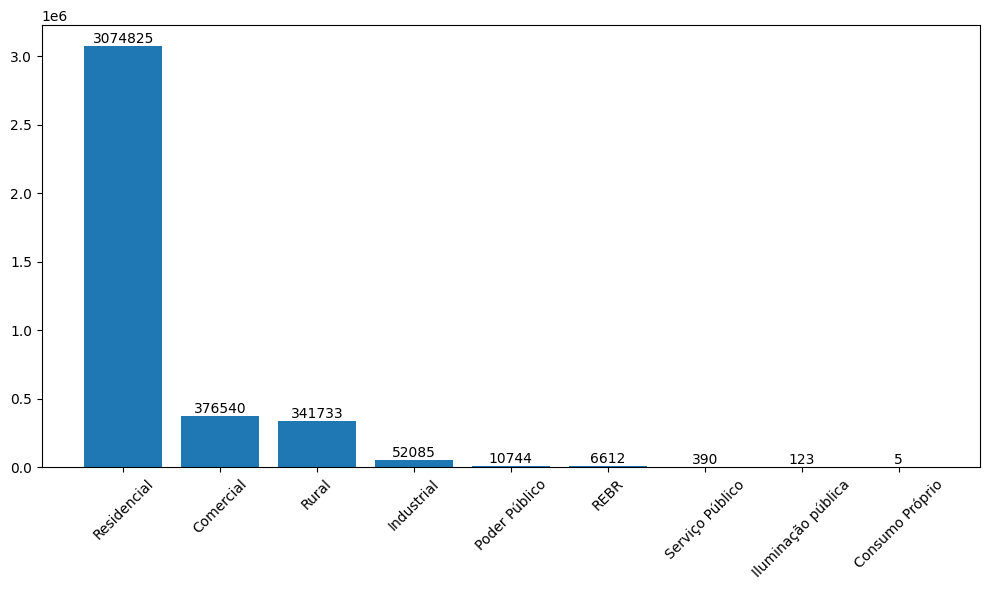

In [66]:
plt.figure(figsize=(10,6))

bar = plt.bar(clas_cons['Classe_consumidor'], clas_cons['qtd_consumidor'])
plt.bar_label(bar, fmt='%.0f')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Classe por tipo de consumidor

In [67]:
analise = dados.groupby(['Tipo_consumidor', 'Classe_consumidor']).agg(
    qtd_consumidor = ('Tipo_consumidor', 'count'),
    kw = ('kW_instalados', 'sum')
).reset_index().sort_values('qtd_consumidor', ascending=False)

analise['Consumidores(%)'] = (analise['qtd_consumidor'] / analise['qtd_consumidor'].sum()) *100

analise

,Tipo_consumidor,Classe_consumidor,qtd_consumidor,kw,Consumidores(%)
6,PF,Residencial,3004496,19923254.51,77.775088
7,PF,Rural,314463,4680986.70,8.140263
0,PF,Comercial,194533,2700656.09,5.035727
9,PJ,Comercial,182007,9195841.74,4.711476
15,PJ,Residencial,70329,1713090.36,1.820553
12,PJ,Industrial,29064,2628738.46,0.752358
16,PJ,Rural,27270,1192657.68,0.705918
3,PF,Industrial,23021,452638.22,0.595927
13,PJ,Poder Público,9200,485434.54,0.238153
5,PF,REBR,6608,38264.86,0.171056


#### Gráfico Classe por quantidade de consumidor

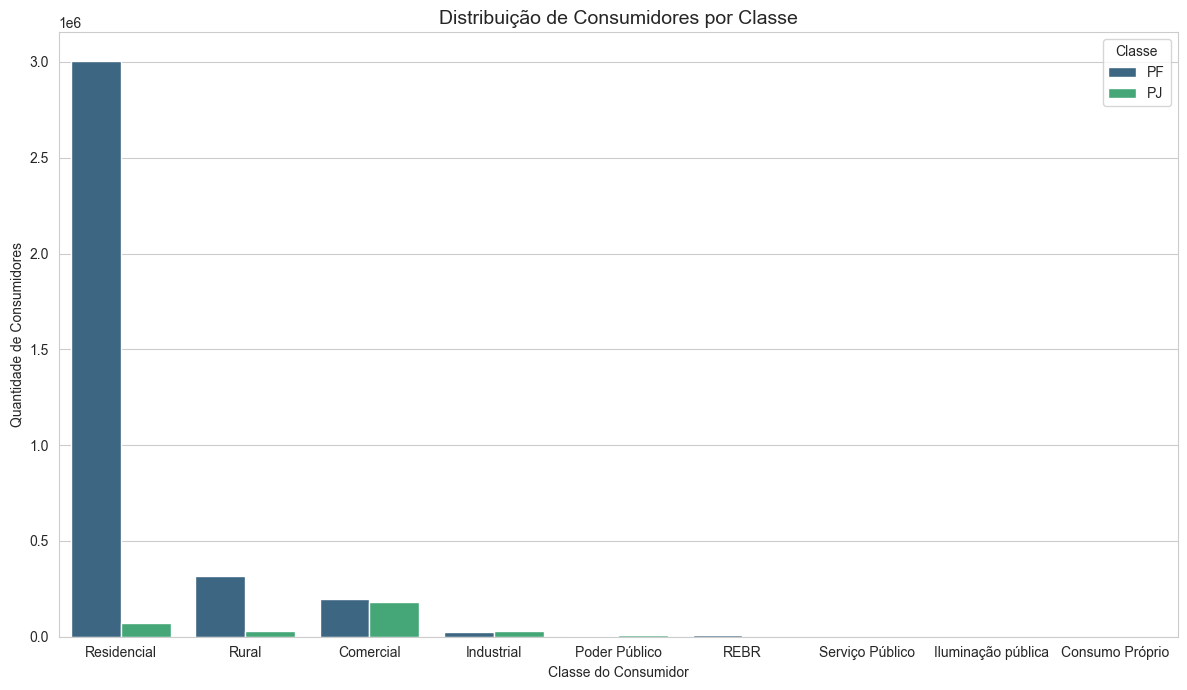

In [68]:
plt.figure(figsize=(12,7))
sns.set_style("whitegrid")

plot = sns.barplot(
    data = analise,
    x='Classe_consumidor',
    y='qtd_consumidor',
    hue='Tipo_consumidor',
    palette='viridis'
)


plt.title('Distribuição de Consumidores por Classe', fontsize=14)
plt.xlabel("Classe do Consumidor")
plt.ylabel('Quantidade de Consumidores')
plt.legend(title='Classe')

plt.tight_layout()
plt.show()

#### Gráfico de Classe por kW

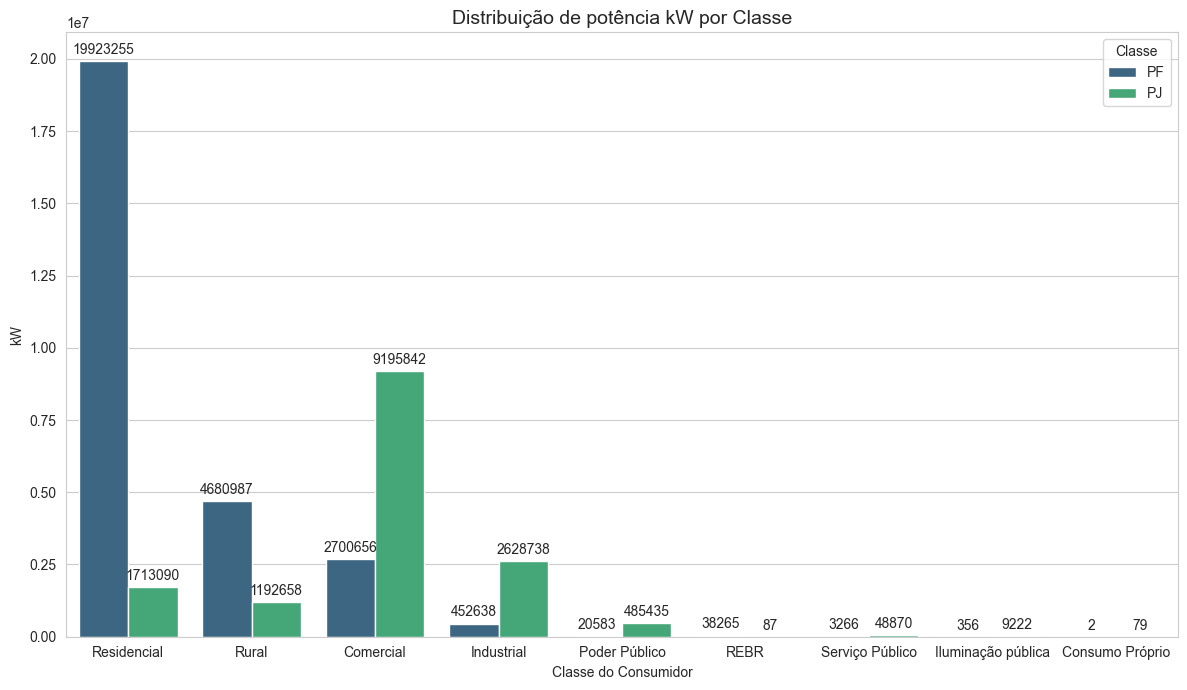

In [69]:
plt.figure(figsize=(12,7))
sns.set_style("whitegrid")

plot = sns.barplot(
    data = analise,
    x='Classe_consumidor',
    y='kw',
    hue='Tipo_consumidor',
    palette='viridis'
)

# Adicionando os valores em cada label
for container in plot.containers:
    plot.bar_label(container, fmt='%.0f', padding=3, fontsize=10)


plt.title('Distribuição de potência kW por Classe', fontsize=14)
plt.xlabel("Classe do Consumidor")
plt.ylabel('kW')
plt.legend(title='Classe')

plt.tight_layout()
plt.show()

### Evolução da Classe ao longo do tempo

In [70]:
clas_ano = dados.groupby(['Classe_consumidor', 'Ano']).agg(
    kW = ('kW_instalados', 'sum'),
    clientes = ('Unidades_Consumidoras', 'count'),
    qtd_unidades = ('Unidades_Consumidoras', 'sum')
).reset_index()

clas_ano['Aumento_clientes(%)'] = clas_ano['clientes'].pct_change().fillna(0)
clas_ano['Aumento_potencia(%)'] = clas_ano['kW'].pct_change().fillna(0)


clas_ano

,Classe_consumidor,Ano,kW,clientes,qtd_unidades,Aumento_clientes(%),Aumento_potencia(%)
0,Comercial,2009,163.65,18,18,0.0,0.000000
1,Comercial,2010,31.20,2,2,-0.888889,-0.809349
2,Comercial,2011,397.65,47,49,22.5,11.745192
3,Comercial,2012,447.13,41,43,-0.12766,0.124431
4,Comercial,2013,461.25,48,49,0.170732,0.031579
...,...,...,...,...,...,...,...
100,Serviço Público,2021,7111.08,72,401,0.894737,1.774298
101,Serviço Público,2022,2799.43,39,64,-0.458333,-0.606328
102,Serviço Público,2023,17340.50,54,411,0.384615,5.194297
103,Serviço Público,2024,14475.38,62,445,0.148148,-0.165227


## Modalidade

In [71]:
info = dados.groupby('Modalidade').agg(
    qtd_instalados = ('Modalidade', 'count'),
    qtd_kW = ('kW_instalados', 'sum'),
    qtd_consumidor = ('Tipo_consumidor', 'count'),
    media_kW = ('kW_instalados', 'mean')
).reset_index().sort_values('qtd_instalados', ascending=False)

info['total_instalados(%)'] = (info['qtd_instalados'] / info['qtd_instalados'].sum()) *100
info

,Modalidade,qtd_instalados,qtd_kW,qtd_consumidor,media_kW,total_instalados(%)
3,Geracao na propria UC,3108062,30922228.17,3108062,9.949038,80.456022
0,Auto consumo remoto,737773,9764150.95,737773,13.234628,19.098165
1,Compartilhada,16881,2403245.15,16881,142.363909,0.436986
2,Condomínio,341,4403.90,341,12.914663,0.008827


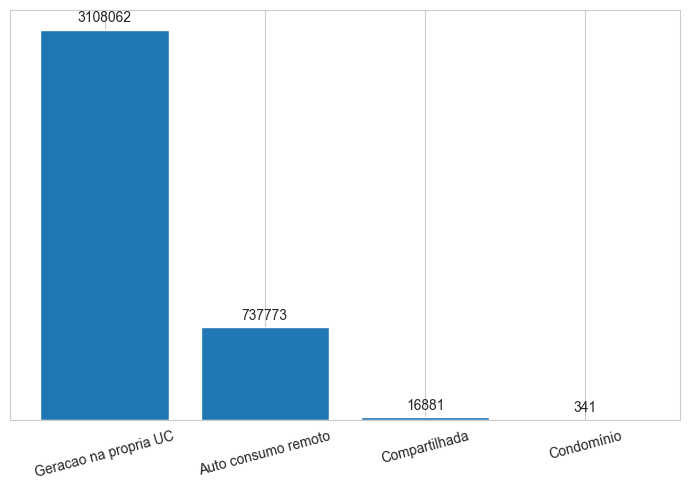

In [72]:
plt.figure(figsize=(7,5))
bar = plt.bar(info['Modalidade'], info['qtd_instalados'])
plt.bar_label(bar, fmt='%.0f', padding=3)
plt.xticks(rotation=15)
plt.yticks([])
plt.tight_layout()
plt.show()

# Tarefa de Negócio

## Pergunta 1 - Quais regiões e estados concentram a maior potência instalada de geração distribuida renovável?

In [73]:
# Seleciona todas as linhas e todas as colunas, exceto 'qtd_unidades'
display(maturidade_regiao.loc[:, maturidade_regiao.columns != 'qtd_modalidades'])

,Região,potencia_total,qtd_unidades,clientes,Locacoes_atendidas,Total_Clientes(%),Total_kW(%)
0,Centro Oeste,7197134.52,877720,568705,0.647934,14.721631,16.701002
1,Nordeste,8592578.33,1323020,839078,0.634214,21.72057,19.939139
2,Norte,3516474.23,381153,308248,0.808725,7.97938,8.160004
3,Sudeste,14598640.60,3156800,1309999,0.414977,33.910942,33.876250
4,Sul,9189200.49,1177230,837027,0.711014,21.667477,21.323605


In [74]:
display(maturidade_estado.loc[:, maturidade_estado.columns != 'qtd_modalidades'])

,Estado,potencia_total,qtd_unidades,clientes,Total_Clientes(%),Total_kW(%)
0,AC,163177.01,15953,14938,0.386689,0.378653
1,AL,597274.17,75018,51255,1.326799,1.385979
2,AM,287630.54,18961,15756,0.407864,0.667449
3,AP,143630.25,12945,12062,0.31224,0.333295
4,BA,2328500.59,452313,261844,6.778155,5.403302
5,CE,1566442.50,174153,134817,3.489904,3.634941
6,DF,521998.49,31387,30235,0.78267,1.211301
7,ES,1209830.49,178417,91716,2.374182,2.807420
8,GO,2167384.66,359135,168698,4.366956,5.029432
9,MA,914245.85,112554,79913,2.068647,2.121514


## Pergunta 2 - Onde ocorre o maior crescimento ao longo do tempo: regiões consolidadas ou emergentes?

In [75]:
# Crescimento(%) médio anual
media_crescimento = evolucao_regional.groupby('Região')['Crescimento_kW(%)'].mean().reset_index()

In [76]:
# Pegando os primeriros valores registrados de cada região
pri_evolucao = evolucao_regional.sort_values('Ano').groupby('Região').first().reset_index()[['Região', 'kW']].rename(columns={'kW' : 'base inicial kW'})

In [77]:
media_crescimento.merge(pri_evolucao, on='Região')

,Região,Crescimento_kW(%),base inicial kW
0,Centro Oeste,2.269108,4.08
1,Nordeste,6.333220,6.00
2,Norte,2.243694,8.20
3,Sudeste,1.542646,188.65
4,Sul,2.518856,14.00


## Pergunta 3 - Quem impulsiona a expansão de geração distribuida: Pessoa Física ou Pessoa Jurídica?

In [78]:
evo_pf_pj

,Tipo_consumidor,Ano,kW,clientes,qtd_unidades,Aumento_Clientes(%),Aumento_kW(%)
0,PF,2009,169.40,20,22,0.0,0.000000
17,PJ,2009,27.45,3,3,-85.0,-83.795750
18,PJ,2010,1.20,1,1,-66.666667,-95.628415
1,PF,2010,50.00,4,5,300.0,4066.666667
2,PF,2011,156.08,34,34,750.0,212.160000
19,PJ,2011,251.65,16,18,-52.941176,61.231420
20,PJ,2012,709.13,12,14,-25.0,181.792172
3,PF,2012,150.00,33,34,175.0,-78.847320
4,PF,2013,381.80,60,71,81.818182,154.533333
21,PJ,2013,571.09,24,25,-60.0,49.578313


In [79]:
evo_pf_pj.groupby('Tipo_consumidor')['Aumento_kW(%)'].mean().reset_index().rename(columns={'Aumento_kW(%)' : 'Aumento_medio_anual(%)'})

,Tipo_consumidor,Aumento_medio_anual(%)
0,PF,313.176433
1,PJ,61.837966


## Pergunta 4 - Quais classes de consumo apresentam mais dinamismo na adoção?

In [80]:
med_pot_ano = clas_ano.groupby('Classe_consumidor')['Aumento_potencia(%)'].mean().reset_index().rename(columns={'Aumento_potencia(%)' : 'Aumento_media_potencia_anual(%)'})

med_pot_ano

,Classe_consumidor,Aumento_media_potencia_anual(%)
0,Comercial,1.590620
1,Consumo Próprio,2.410854
2,Iluminação pública,2.463495
3,Industrial,1.904526
4,Poder Público,5.918830
5,REBR,3.367475
6,Residencial,2.196546
7,Rural,1.632438
8,Serviço Público,1.055931


## Pergunta 5 - O crescimento da geração distribuida é concentrado ou descentralizado no território nacional?

É necessário considerar os seguintes itens:

* Participação por estado;
* Comparação temporal;
* Índice de Herfindahl-Hirschman (HHI)

In [81]:
# Participação anual por estado e Ano
# transform auxilia a fazer a soma por grupo

evol_uf['pot_ano(%)'] = (evol_uf['kW'] / evol_uf.groupby('Ano')['kW'].transform('sum')) *100


evol_uf.head(30)

,Ano,Estado,qtd_unidades,qtd_clientes,kW,Evolução_clientes(%),Evolução_potencia(%),pot_ano(%)
71,2016,AC,3,3,36.50,0.0,0.000000,0.060150
97,2017,AC,16,15,192.81,400.0,428.246575,0.127797
124,2018,AC,32,30,429.34,100.0,122.675172,0.102202
151,2019,AC,129,129,2397.76,330.0,458.475800,0.152426
178,2020,AC,506,500,5968.64,287.596899,148.925664,0.206344
205,2021,AC,1592,1403,16611.03,180.6,178.305108,0.364674
232,2022,AC,2136,1778,20542.24,26.728439,23.666263,0.257432
259,2023,AC,1922,1667,23135.84,-6.24297,12.625692,0.278856
286,2024,AC,4806,4602,46728.37,176.064787,101.973950,0.487976
313,2025,AC,4811,4811,47134.48,4.541504,0.869087,0.622729


In [82]:
hhi = evol_uf.groupby('Ano')['pot_ano(%)'].apply(lambda x: (x**2).sum()).reset_index(name='hhi')

hhi

,Ano,hhi
0,2009,9201.582919
1,2010,4232.177734
2,2011,7709.575047
3,2012,3459.675946
4,2013,4486.443381
5,2014,1145.871421
6,2015,2147.582127
7,2016,1473.000180
8,2017,1422.025692
9,2018,1022.159741


HHI < 1000 - Mercado Descentralizado

HHI > 1000 | HHI < 1800 - Concentração Moderado

HHI > 1800 - Mercado Centralizado

In [83]:
hhi_inicio = hhi.iloc[0]['hhi']
hhi_fim = hhi.iloc[-1]['hhi']

print(f"HHI início: {hhi_inicio}")
print(f"HHI final: {hhi_fim}")

HHI início: 9201.582919294873
HHI final: 649.7290077695707


Quanto mais próximo de 10 mil, maior é a participação de uma única empresa

In [84]:
top_estado = evol_uf.groupby('Estado')['kW'].sum().nlargest(5).index

evol_uf[evol_uf['Estado'].isin(top_estado)]

,Ano,Estado,qtd_unidades,qtd_clientes,kW,Evolução_clientes(%),Evolução_potencia(%),pot_ano(%)
6,2011,MG,4,4,27.00,0.0,0.000000,6.622029
13,2012,MG,1,1,6.80,-75.0,-74.814815,0.791498
21,2013,MG,11,11,178.36,1000.0,2522.941176,18.717795
35,2014,MG,57,49,266.49,345.454545,49.411303,9.843423
56,2015,MG,1583,300,6377.07,512.244898,2292.986604,41.922993
...,...,...,...,...,...,...,...,...
230,2021,SP,79631,67402,574777.06,128.760521,73.670228,12.618515
257,2022,SP,155765,131200,1187963.61,94.652978,106.682502,14.887367
284,2023,SP,134083,106941,1235360.83,-18.490091,3.989787,14.889809
311,2024,SP,243258,153741,1609790.39,43.762448,30.309328,16.810746


## Pergunta 6 - Onde está o maior potencial de crescimento futuro da Geração Distribuída no Brasil?

In [98]:
# media evolução(%) anual

media_evol_uf = evol_uf.groupby('Estado')['Evolução_potencia(%)'].mean().reset_index()
media_evol_uf = media_evol_uf.rename(columns={'Evolução_potencia(%)': 'Evolução_media_potencia(%)'})
media_evol_uf

,Estado,Evolução_media_potencia(%)
0,AC,147.576331
1,AL,124.058459
2,AM,176.017555
3,AP,762.990584
4,BA,109.594034
5,CE,185.337350
6,DF,129.309490
7,ES,320.880988
8,GO,435.088212
9,MA,174.525966


In [123]:
# Unir os dois dataframes evol_uf com media_evol_uf, além de retirar as colunas irrelevantes para essa pergunta
analise = media_evol_uf.merge(evol_uf, on= 'Estado', how='inner')
analise = analise[['Estado', 'Ano', 'kW', 'Evolução_media_potencia(%)', 'Evolução_potencia(%)']]

analise

,Estado,Ano,kW,Evolução_media_potencia(%),Evolução_potencia(%)
0,AC,2016,36.50,147.576331,0.000000
1,AC,2017,192.81,147.576331,428.246575
2,AC,2018,429.34,147.576331,122.675172
3,AC,2019,2397.76,147.576331,458.475800
4,AC,2020,5968.64,147.576331,148.925664
...,...,...,...,...,...
335,TO,2021,62055.94,311.200959,65.231443
336,TO,2022,92744.40,311.200959,49.452897
337,TO,2023,121415.89,311.200959,30.914524
338,TO,2024,126281.43,311.200959,4.007334


Para fazer uma projeção de quais estados possuem o maior potencial de crescimento futuro, consideraremos os dados dos últimos 5 anos

In [127]:
ano_max =  analise['Ano'].max()
periodo_analise = 5

ano_valido = list(range(ano_max - periodo_analise + 1, ano_max +1))

In [128]:
analise_recente = analise[analise['Ano'].isin(ano_valido)]

In [129]:
# Criando uma coluna com foco de determinar o nível de evolução ao longo do tempo

analise_recente['crescimento'] = pd.cut(analise_recente['Evolução_potencia(%)'], 4, labels=['baixo', 'medio', 'alto', 'muito alto'])

analise

C:\Users\Cássio Lanna\AppData\Local\Temp\ipykernel_5944\3049277786.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Estado,Ano,kW,Evolução_media_potencia(%),Evolução_potencia(%),crescimento,crescimento_base
0,AC,2016,36.50,147.576331,0.000000,baixo,baixa
1,AC,2017,192.81,147.576331,428.246575,baixo,baixa
2,AC,2018,429.34,147.576331,122.675172,baixo,baixa
3,AC,2019,2397.76,147.576331,458.475800,baixo,baixa
4,AC,2020,5968.64,147.576331,148.925664,baixo,baixa
...,...,...,...,...,...,...,...
335,TO,2021,62055.94,311.200959,65.231443,baixo,baixa
336,TO,2022,92744.40,311.200959,49.452897,baixo,baixa
337,TO,2023,121415.89,311.200959,30.914524,baixo,baixa
338,TO,2024,126281.43,311.200959,4.007334,baixo,baixa


In [130]:
# determinar o nível de evolução da potência por estado
analise_recente['crescimento_base'] = pd.cut(analise_recente['kW'], 4, labels=['baixa', 'media', 'alta', 'muito alta'])

analise

C:\Users\Cássio Lanna\AppData\Local\Temp\ipykernel_5944\1724742815.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Estado,Ano,kW,Evolução_media_potencia(%),Evolução_potencia(%),crescimento,crescimento_base
0,AC,2016,36.50,147.576331,0.000000,baixo,baixa
1,AC,2017,192.81,147.576331,428.246575,baixo,baixa
2,AC,2018,429.34,147.576331,122.675172,baixo,baixa
3,AC,2019,2397.76,147.576331,458.475800,baixo,baixa
4,AC,2020,5968.64,147.576331,148.925664,baixo,baixa
...,...,...,...,...,...,...,...
335,TO,2021,62055.94,311.200959,65.231443,baixo,baixa
336,TO,2022,92744.40,311.200959,49.452897,baixo,baixa
337,TO,2023,121415.89,311.200959,30.914524,baixo,baixa
338,TO,2024,126281.43,311.200959,4.007334,baixo,baixa


In [135]:
# Selecionando os estados que tem um alto crescimento anual, mas com um déficit de potência instaladas

alto_potencial = analise_recente[(analise_recente['crescimento'].isin(['alto', 'muito alto'])) & (analise_recente['crescimento_base'].isin(['baixa', 'media']))].sort_values(by='Evolução_potencia(%)', ascending=False)

alto_potencial

,Estado,Ano,kW,Evolução_media_potencia(%),Evolução_potencia(%),crescimento,crescimento_base
39,AP,2023,33714.39,762.990584,268.797817,muito alto,baixa
249,RN,2025,75643.91,147.968595,202.717312,muito alto,baixa
5,AC,2021,16611.03,147.576331,178.305108,alto,baixa
88,ES,2022,202847.95,320.880988,176.663294,alto,baixa
271,RR,2023,20895.01,446.974235,172.189526,alto,baixa
75,DF,2022,125174.75,129.309490,141.470672,alto,baixa
17,AL,2022,88973.53,124.058459,135.747925,alto,baixa
37,AP,2021,7210.95,762.990584,123.301076,alto,baixa
164,PA,2021,135786.01,341.382297,120.932986,alto,baixa
111,MA,2021,114358.06,174.525966,107.521757,alto,baixa


Esses estados apresentam condições recentes compatíveis com expansão futura, percebendo que os estados com maiores condições são da região Norte e Nordeste